In [54]:
library(lme4)
library(ggplot2)
library(dplyr)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [59]:
raw = read.csv('..\\data\\interim\\lipids_data_for_R.csv', sep=',')

In [119]:
feat_cols <- colnames(raw)[c(2: (dim(raw)[2] - 5))]  # Exclude non-feature columns
# feat_cols <- c(grep('unknown', colnames(raw), value=TRUE))  # Only gets the unknowns, not the ID'd
feat_cols

[1] "unknown_67905463_0536"              
   [2] "unknown_6411087_0537"               
   [3] "unknown_95115973_0541"              
   [4] "unknown_32903067_0542"              
   [5] "unknown_96913147_0544"              
   [6] "unknown_62313641_0546"              
   [7] "unknown_29108359_0551"              
   [8] "unknown_35299652_0553"              
   [9] "unknown_24709372_0554"              
  [10] "unknown_60514441_0555"              
  [11] "unknown_3490174_056"                
  [12] "unknown_2581102_0572"               
  [13] "unknown_93019086_0587"              
  [14] "unknown_63810034_0588"              
  [15] "unknown_49504285_0599"              
  [16] "unknown_34000061_0608"              
  [17] "unknown_34199973_0612"              
  [18] "unknown_44899011_0667"              
  [19] "unknown_54696698_0667"              
  [20] "unknown_30502353_0668"              
  [21] "unknown_31306619_0668"              
  [22] "unknown_56700714_0669"              
  [23] "unknown_64901001_067"               
  [24] "unknown_36698618_067"               
  [25] "unknown_63498871_067"               
  [26] "unknown_55298492_0673"              
  [27] "unknown_48500394_0676"              
  [28] "unknown_4349559_068"                
  [29] "unknown_55299005_068"               
  [30] "unknown_71096271_0683"              
  [31] "unknown_48695691_0689"              
  [32] "unknown_6809585_0692"               
  [33] "unknown_100489545_0692"             
  [34] "unknown_30094617_0692"              
  [35] "unknown_80893848_0694"              
  [36] "unknown_41897479_0694"              
  [37] "unknown_74290997_0695"              
  [38] "unknown_67688025_0695"              
  [39] "unknown_48092703_0696"              
  [40] "unknown_53292566_0699"              
  [41] "unknown_45320969_0708"              
  [42] "unknown_40918292_0715"              
  [43] "unknown_54126349_0716"              
  [44] "unknown_55029077_0736"              
  [45] "unknown_58528931_0741"              
  [46] "unknown_47725003_0754"              
  [47] "unknown_62229077_0818"              
  [48] "unknown_29715344_084"               
  [49] "unknown_80735065_0844"              
  [50] "unknown_45316891_0871"              
  [51] "unknown_64511963_0873"              
  [52] "unknown_63134955_0876"              
  [53] "unknown_32903012_0878"              
  [54] "unknown_34399503_0909"              
  [55] "unknown_34199976_092"               
  [56] "unknown_31116907_0923"              
  [57] "unknown_37625961_0933"              
  [58] "unknown_31508023_0933"              
  [59] "unknown_46336401_0936"              
  [60] "LysoPC_205_54232452_1036"           
  [61] "unknown_32518466_1039"              
  [62] "unknown_34399503_113"               
  [63] "LysoPC_181_52235236_1137"           
  [64] "unknown_56433154_1361"              
  [65] "unknown_101567139_1367"             
  [66] "unknown_42434225_1412"              
  [67] "LysoPC_225_57035516_1417"           
  [68] "unknown_44120361_1418"              
  [69] "LysoPC_171_5083407_1452"            
  [70] "LysoPC_160_49634018_1489"           
  [71] "unknown_48031018_1495"              
  [72] "unknown_59932092_1507"              
  [73] "unknown_64236377_153"               
  [74] "LysoPC_203_54635345_1546"           
  [75] "LysoPE_160_4522789_158"             
  [76] "unknown_84435101_1611"              
  [77] "LysoPC_160_49633969_1613"           
  [78] "unknown_59230267_1613"              
  [79] "unknown_53733191_1614"              
  [80] "unknown_63634991_1614"              
  [81] "unknown_101768756_1622"             
  [82] "LysoPC_181_5223559_1644"            
  [83] "unknown_44120386_1767"              
  [84] "LysoPC_181_5223559_1786"            
  [85] "unknown_56334766_1789"              
  [86] "LysoPC_224_57237091_1824"           
  [87] "unknown_48236084_1861"              
  [88] "unknown_46633075_1864"              
  [89] "AC_181_42635785_1884"              

In [138]:
?logLik

In [223]:
my_lm <- lm(sprintf("%s ~ glucose_tolerance * bg_type", "PC_180_203_81261694_9916"), data=raw)
summary(my_lm)


Call:
lm(formula = sprintf("%s ~ glucose_tolerance * bg_type", "PC_180_203_81261694_9916"), 
    data = raw)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.86823 -0.15228  0.01228  0.27555  0.79987 

Coefficients:
                                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)                           25.9701     0.1375 188.923  < 2e-16 ***
glucose_toleranceimpaired              0.2881     0.1739   1.657 0.103326    
glucose_tolerancenormal                0.2123     0.2173   0.977 0.332934    
bg_typeRBG                             0.6896     0.1944   3.547 0.000815 ***
glucose_toleranceimpaired:bg_typeRBG  -0.4420     0.2459  -1.797 0.077884 .  
glucose_tolerancenormal:bg_typeRBG    -0.8481     0.3074  -2.759 0.007895 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4124 on 54 degrees of freedom
Multiple R-squared:  0.2669,	Adjusted R-squared:  0.199 
F-statistic: 3.932 on 5 and 54 DF,  p-value

In [260]:
str(summary(my_lmer))

List of 18
 $ methTitle   : chr "Linear mixed model fit by REML"
 $ objClass    : chr "lmerMod"
  ..- attr(*, "package")= chr "lme4"
 $ devcomp     :List of 2
  ..$ cmp : Named num [1:10] 2.169 12.743 8.679 0.225 8.904 ...
  .. ..- attr(*, "names")= chr [1:10] "ldL2" "ldRX2" "wrss" "ussq" ...
  ..$ dims: Named int [1:12] 60 60 6 54 10 1 1 1 0 6 ...
  .. ..- attr(*, "names")= chr [1:12] "N" "n" "p" "nmp" ...
 $ isLmer      : logi TRUE
 $ useScale    : logi TRUE
 $ logLik      :Class 'logLik' : -35 (df=8)
 $ family      : NULL
 $ link        : NULL
 $ ngrps       : Named num 10
  ..- attr(*, "names")= chr "rat_label"
 $ coefficients: num [1:6, 1:3] 25.97 0.288 0.212 0.69 -0.442 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:6] "(Intercept)" "glucose_toleranceimpaired" "glucose_tolerancenormal" "bg_typeRBG" ...
  .. ..$ : chr [1:3] "Estimate" "Std. Error" "t value"
 $ sigma       : num 0.406
 $ vcov        :Formal class 'dpoMatrix' [package "Matrix"] with 5 slots
  .. ..@ x    

NULL

In [224]:
my_lmer <- lmer(sprintf("%s ~ glucose_tolerance * bg_type + (1|rat_label)", "PC_180_203_81261694_9916"), data=raw)
summary(my_lmer)

Linear mixed model fit by REML ['lmerMod']
Formula: PC_180_203_81261694_9916 ~ glucose_tolerance * bg_type + (1 |  
    rat_label)
   Data: raw

REML criterion at convergence: 70.8

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.4696 -0.3078  0.0162  0.6521  1.8527 

Random effects:
 Groups    Name        Variance Std.Dev.
 rat_label (Intercept) 0.006656 0.08158 
 Residual              0.164890 0.40607 
Number of obs: 60, groups:  rat_label, 10

Fixed effects:
                                     Estimate Std. Error t value
(Intercept)                           25.9701     0.1433 181.208
glucose_toleranceimpaired              0.2881     0.1813   1.589
glucose_tolerancenormal                0.2123     0.2266   0.937
bg_typeRBG                             0.6896     0.1914   3.602
glucose_toleranceimpaired:bg_typeRBG  -0.4420     0.2421  -1.825
glucose_tolerancenormal:bg_typeRBG    -0.8481     0.3027  -2.802

Correlation of Fixed Effects:
                 (Intr) glcs_tlrn

In [317]:
feat_cols[500]

[1] "PlasmanylPC_O160_160_72059094_10096"

In [318]:
feat <- 'PlasmanylPC_O160_160_72059094_10096'

full_model <- lmer(sprintf("%s ~ glucose_tolerance * bg_type + (1|rat_label)", feat),
                   data=raw, REML=FALSE)

no_cross <- lmer(sprintf("%s ~ glucose_tolerance + bg_type + (1|rat_label)", feat),
                 data=raw, REML=FALSE)
no_gluc  <- lmer(sprintf("%s ~                     bg_type + (1|rat_label)", feat), 
                 data=raw, REML=FALSE)
no_feed  <- lmer(sprintf("%s ~ glucose_tolerance           + (1|rat_label)", feat), 
                 data=raw, REML=FALSE)

summary(full_model)
print('----------------------------------------------')
summary(no_gluc)
print('----------------------------------------------')
summary(no_feed)
print('----------------------------------------------')
summary(no_cross)


Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: PlasmanylPC_O160_160_72059094_10096 ~ glucose_tolerance * bg_type +  
    (1 | rat_label)
   Data: raw

     AIC      BIC   logLik deviance df.resid 
    42.6     59.3    -13.3     26.6       52 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.77255 -0.52551  0.03305  0.49494  2.53030 

Random effects:
 Groups    Name        Variance Std.Dev.
 rat_label (Intercept) 0.01700  0.1304  
 Residual              0.07942  0.2818  
Number of obs: 60, groups:  rat_label, 10

Fixed effects:
                                     Estimate Std. Error t value
(Intercept)                          21.23858    0.12039 176.422
glucose_toleranceimpaired             0.33300    0.15228   2.187
glucose_tolerancenormal               0.25826    0.19035   1.357
bg_typeRBG                            0.32521    0.13285   2.448
glucose_toleranceimpaired:bg_typeRBG -0.10978    0.16804  -0.653
glucose_tolerancenormal:bg_typeRBG   

[1] "----------------------------------------------"


Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: PlasmanylPC_O160_160_72059094_10096 ~ bg_type + (1 | rat_label)
   Data: raw

     AIC      BIC   logLik deviance df.resid 
    39.5     47.8    -15.7     31.5       56 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.9107 -0.5669  0.1104  0.5534  2.4162 

Random effects:
 Groups    Name        Variance Std.Dev.
 rat_label (Intercept) 0.03279  0.1811  
 Residual              0.08050  0.2837  
Number of obs: 60, groups:  rat_label, 10

Fixed effects:
            Estimate Std. Error t value
(Intercept) 21.45673    0.07722 277.870
bg_typeRBG   0.27486    0.07326   3.752

Correlation of Fixed Effects:
           (Intr)
bg_typeRBG -0.474

[1] "----------------------------------------------"


Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: PlasmanylPC_O160_160_72059094_10096 ~ glucose_tolerance + (1 |  
    rat_label)
   Data: raw

     AIC      BIC   logLik deviance df.resid 
    49.6     60.1    -19.8     39.6       55 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-3.04043 -0.51707  0.07415  0.65512  1.71528 

Random effects:
 Groups    Name        Variance Std.Dev.
 rat_label (Intercept) 0.01305  0.1142  
 Residual              0.10316  0.3212  
Number of obs: 60, groups:  rat_label, 10

Fixed effects:
                          Estimate Std. Error t value
(Intercept)                21.4012     0.1004 213.158
glucose_toleranceimpaired   0.2781     0.1270   2.190
glucose_tolerancenormal     0.2696     0.1587   1.698

Correlation of Fixed Effects:
            (Intr) glcs_tlrncm
glcs_tlrncm -0.791            
glcs_tlrncn -0.632  0.500     

[1] "----------------------------------------------"


Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: PlasmanylPC_O160_160_72059094_10096 ~ glucose_tolerance + bg_type +  
    (1 | rat_label)
   Data: raw

     AIC      BIC   logLik deviance df.resid 
    39.2     51.8    -13.6     27.2       54 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.8479 -0.5740  0.0166  0.5358  2.3865 

Random effects:
 Groups    Name        Variance Std.Dev.
 rat_label (Intercept) 0.01682  0.1297  
 Residual              0.08050  0.2837  
Number of obs: 60, groups:  rat_label, 10

Fixed effects:
                          Estimate Std. Error t value
(Intercept)               21.26376    0.10687 198.962
glucose_toleranceimpaired  0.27811    0.12700   2.190
glucose_tolerancenormal    0.26960    0.15875   1.698
bg_typeRBG                 0.27486    0.07326   3.752

Correlation of Fixed Effects:
            (Intr) glcs_tlrncm glcs_tlrncn
glcs_tlrncm -0.743                        
glcs_tlrncn -0.594  0.500                 
bg_type

In [319]:
anova(full_model, no_gluc)
anova(full_model, no_feed)
anova(full_model, no_cross)

,Df,AIC,BIC,logLik,deviance,Chisq,Chi Df,Pr(>Chisq)
no_gluc,4,39.46982,47.84720,-15.73491,31.46982,NA,NA,NA
full_model,8,42.55561,59.31037,-13.27781,26.55561,4.914211,4,0.2962138


,Df,AIC,BIC,logLik,deviance,Chisq,Chi Df,Pr(>Chisq)
no_feed,5,49.63308,60.10480,-19.81654,39.63308,NA,NA,NA
full_model,8,42.55561,59.31037,-13.27781,26.55561,13.07747,3,0.004472039


,Df,AIC,BIC,logLik,deviance,Chisq,Chi Df,Pr(>Chisq)
no_cross,6,39.22964,51.79571,-13.61482,27.22964,NA,NA,NA
full_model,8,42.55561,59.31037,-13.27781,26.55561,0.6740271,2,0.7138992


In [ ]:
isC

In [285]:
isSingular(no_cross)

[1] TRUE

In [227]:
feat_cols[66:69]

[1] "unknown_42434225_1412"    "LysoPC_225_57035516_1417"
[3] "unknown_44120361_1418"    "LysoPC_171_5083407_1452"

In [263]:
?lmer

In [275]:
for (feature in feat_cols[300:300]) {
    full     <- lmer(sprintf("%s ~ glucose_tolerance * bg_type + (1|rat_label)", feature), data=raw, REML=FALSE)
    no_gluc  <- lmer(sprintf("%s ~                     bg_type + (1|rat_label)", feature), data=raw, REML=FALSE)
    no_feed  <- lmer(sprintf("%s ~ glucose_tolerance           + (1|rat_label)", feature), data=raw, REML=FALSE)
    no_cross <- lmer(sprintf("%s ~ glucose_tolerance + bg_type + (1|rat_label)", feature), data=raw, REML=FALSE)
#     print(summary(full))
#     print(summary(no_gluc))
#     s <- str(no_gluc)
#     print(summary(no_gluc))
    
#     print(anova(full, no_cross))
#     print('\n\n\n\n\n')
    print(summary(no_feed))
    
}

boundary (singular) fit: see ?isSingular


Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: unknown_94658014_8407 ~ glucose_tolerance + (1 | rat_label)
   Data: raw

     AIC      BIC   logLik deviance df.resid 
    56.7     67.2    -23.4     46.7       55 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.7831 -0.7032 -0.1193  0.7486  1.7559 

Random effects:
 Groups    Name        Variance Std.Dev.
 rat_label (Intercept) 0.0000   0.0000  
 Residual              0.1275   0.3571  
Number of obs: 60, groups:  rat_label, 10

Fixed effects:
                          Estimate Std. Error t value
(Intercept)               22.54373    0.08417 267.841
glucose_toleranceimpaired -0.08071    0.10647  -0.758
glucose_tolerancenormal   -0.15234    0.13308  -1.145

Correlation of Fixed Effects:
            (Intr) glcs_tlrncm
glcs_tlrncm -0.791            
glcs_tlrncn -0.632  0.500     
convergence code: 0
boundary (singular) fit: see ?isSingular



In [233]:
checkConv(my_lm)

ERROR: Error in checkConv(my_lm): argument "lbound" is missing, with no default


In [146]:
logLik(my_lm)

'log Lik.' -28.82862 (df=7)

In [168]:
attributes(my_lm)

$names
 [1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "contrasts"     "xlevels"       "call"          "terms"        
[13] "model"        

$class
[1] "lm"

In [167]:
summary(my_lm)$coef

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),25.9701460,0.1374640,188.9233187,7.439314e-78
glucose_toleranceimpaired,0.2881123,0.1738797,1.6569635,1.033265e-01
glucose_tolerancenormal,0.2123468,0.2173496,0.9769829,3.329342e-01
bg_typeRBG,0.6895590,0.1944034,3.5470527,8.146445e-04
glucose_toleranceimpaired:bg_typeRBG,-0.4419561,0.2459030,-1.7972783,7.788413e-02
glucose_tolerancenormal:bg_typeRBG,-0.8481150,0.3073787,-2.7591856,7.894831e-03


In [205]:
summary(my_lmer)$logLi    

'log Lik.' -35.41196 (df=8)

In [213]:
str(my_lmer)

Formal class 'lmerMod' [package "lme4"] with 13 slots
  ..@ resp   :Reference class 'lmerResp' [package "lme4"] with 9 fields
  .. ..$ Ptr    :<externalptr> 
  .. ..$ mu     : num [1:60] 26 26.3 26.2 26.5 26.2 ...
  .. ..$ offset : num [1:60] 0 0 0 0 0 0 0 0 0 0 ...
  .. ..$ sqrtXwt: num [1:60] 1 1 1 1 1 1 1 1 1 1 ...
  .. ..$ sqrtrwt: num [1:60] 1 1 1 1 1 1 1 1 1 1 ...
  .. ..$ weights: num [1:60] 1 1 1 1 1 1 1 1 1 1 ...
  .. ..$ wtres  : num [1:60] -0.0554 -0.4256 -0.109 -0.0433 0.0603 ...
  .. ..$ y      : num [1:60] 26 25.8 26.1 26.4 26.2 ...
  .. ..$ REML   : int 6
  .. ..and 28 methods, of which 14 are  possibly relevant:
  .. ..  allInfo, copy#envRefClass, initialize, initialize#lmResp,
  .. ..  initializePtr, initializePtr#lmResp, objective, ptr, ptr#lmResp,
  .. ..  setOffset, setResp, setWeights, updateMu, wrss
  ..@ Gp     : int [1:2] 0 10
  ..@ call   : language lmer(formula = PC_180_203_81261694_9916 ~ glucose_tolerance * bg_type +      (1 | rat_label), data = raw)
  ..@ f

In [248]:
slot(my_lmer, 'resp')

Reference class object of class "lmerResp"
Field "Ptr":
<pointer: 0x000000003ec99740>
Field "mu":
 [1] 26.01768 26.26473 26.17684 26.47137 26.18815 26.50593 26.01828 25.97588
 [9] 26.47137 25.91688 26.51233 26.02959 26.23856 26.60644 26.01768 26.25833
[17] 26.23856 26.02959 25.97588 26.70723 26.22377 26.01828 26.22377 26.66544
[25] 26.48616 26.02959 25.91688 26.17684 26.48616 26.55351 26.26473 26.70723
[33] 26.25833 26.26473 26.55351 26.48616 26.22377 26.66544 26.70723 26.18815
[41] 26.30591 26.55351 26.17684 25.91688 26.30591 25.97588 26.47137 26.01768
[49] 26.60644 26.18815 26.25833 26.66544 26.51233 26.30591 26.01828 26.23856
[57] 26.51233 26.60644 26.50593 26.50593
Field "offset":
 [1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[39] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
Field "sqrtXwt":
 [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[39] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
Field "sqrtrwt":
 [1] 1 1 1 1

In [215]:
?slot

In [256]:
s <- str(my_lmer)
s$Ptr

Formal class 'lmerMod' [package "lme4"] with 13 slots
  ..@ resp   :Reference class 'lmerResp' [package "lme4"] with 9 fields
  .. ..$ Ptr    :<externalptr> 
  .. ..$ mu     : num [1:60] 26 26.3 26.2 26.5 26.2 ...
  .. ..$ offset : num [1:60] 0 0 0 0 0 0 0 0 0 0 ...
  .. ..$ sqrtXwt: num [1:60] 1 1 1 1 1 1 1 1 1 1 ...
  .. ..$ sqrtrwt: num [1:60] 1 1 1 1 1 1 1 1 1 1 ...
  .. ..$ weights: num [1:60] 1 1 1 1 1 1 1 1 1 1 ...
  .. ..$ wtres  : num [1:60] -0.0554 -0.4256 -0.109 -0.0433 0.0603 ...
  .. ..$ y      : num [1:60] 26 25.8 26.1 26.4 26.2 ...
  .. ..$ REML   : int 6
  .. ..and 28 methods, of which 14 are  possibly relevant:
  .. ..  allInfo, copy#envRefClass, initialize, initialize#lmResp,
  .. ..  initializePtr, initializePtr#lmResp, objective, ptr, ptr#lmResp,
  .. ..  setOffset, setResp, setWeights, updateMu, wrss
  ..@ Gp     : int [1:2] 0 10
  ..@ call   : language lmer(formula = PC_180_203_81261694_9916 ~ glucose_tolerance * bg_type +      (1 | rat_label), data = raw)
  ..@ f

NULL

In [245]:
str(summary(my_lmer))

List of 18
 $ methTitle   : chr "Linear mixed model fit by REML"
 $ objClass    : chr "lmerMod"
  ..- attr(*, "package")= chr "lme4"
 $ devcomp     :List of 2
  ..$ cmp : Named num [1:10] 2.169 12.743 8.679 0.225 8.904 ...
  .. ..- attr(*, "names")= chr [1:10] "ldL2" "ldRX2" "wrss" "ussq" ...
  ..$ dims: Named int [1:12] 60 60 6 54 10 1 1 1 0 6 ...
  .. ..- attr(*, "names")= chr [1:12] "N" "n" "p" "nmp" ...
 $ isLmer      : logi TRUE
 $ useScale    : logi TRUE
 $ logLik      :Class 'logLik' : -35 (df=8)
 $ family      : NULL
 $ link        : NULL
 $ ngrps       : Named num 10
  ..- attr(*, "names")= chr "rat_label"
 $ coefficients: num [1:6, 1:3] 25.97 0.288 0.212 0.69 -0.442 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:6] "(Intercept)" "glucose_toleranceimpaired" "glucose_tolerancenormal" "bg_typeRBG" ...
  .. ..$ : chr [1:3] "Estimate" "Std. Error" "t value"
 $ sigma       : num 0.406
 $ vcov        :Formal class 'dpoMatrix' [package "Matrix"] with 5 slots
  .. ..@ x    

In [199]:
summary(my_lmer)

Linear mixed model fit by REML ['lmerMod']
Formula: PC_180_203_81261694_9916 ~ glucose_tolerance * bg_type + (1 |  
    rat_label)
   Data: raw

REML criterion at convergence: 70.8

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.4696 -0.3078  0.0162  0.6521  1.8527 

Random effects:
 Groups    Name        Variance Std.Dev.
 rat_label (Intercept) 0.006656 0.08158 
 Residual              0.164890 0.40607 
Number of obs: 60, groups:  rat_label, 10

Fixed effects:
                                     Estimate Std. Error t value
(Intercept)                           25.9701     0.1433 181.208
glucose_toleranceimpaired              0.2881     0.1813   1.589
glucose_tolerancenormal                0.2123     0.2266   0.937
bg_typeRBG                             0.6896     0.1914   3.602
glucose_toleranceimpaired:bg_typeRBG  -0.4420     0.2421  -1.825
glucose_tolerancenormal:bg_typeRBG    -0.8481     0.3027  -2.802

Correlation of Fixed Effects:
                 (Intr) glcs_tlrn

In [196]:
summary(my_lmer)[15]

$call
lmer(formula = PC_180_203_81261694_9916 ~ glucose_tolerance * 
    bg_type + (1 | rat_label), data = raw)


In [177]:
attributes(my_lmer)

   [[ suppressing 60 column names '1', '2', '3' ... ]]
   [[ suppressing 60 column names '1', '2', '3' ... ]]
   [[ suppressing 60 column names '1', '2', '3' ... ]]


$resp
Reference class object of class "lmerResp"
Field "Ptr":
<pointer: 0x000000004382a740>
Field "mu":
 [1] 26.01768 26.26473 26.17684 26.47137 26.18815 26.50593 26.01828 25.97588
 [9] 26.47137 25.91688 26.51233 26.02959 26.23856 26.60644 26.01768 26.25833
[17] 26.23856 26.02959 25.97588 26.70723 26.22377 26.01828 26.22377 26.66544
[25] 26.48616 26.02959 25.91688 26.17684 26.48616 26.55351 26.26473 26.70723
[33] 26.25833 26.26473 26.55351 26.48616 26.22377 26.66544 26.70723 26.18815
[41] 26.30591 26.55351 26.17684 25.91688 26.30591 25.97588 26.47137 26.01768
[49] 26.60644 26.18815 26.25833 26.66544 26.51233 26.30591 26.01828 26.23856
[57] 26.51233 26.60644 26.50593 26.50593
Field "offset":
 [1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[39] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
Field "sqrtXwt":
 [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[39] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
Field "sqrtrwt":
 [1] 1

In [147]:
logLik(my_lmer)

'log Lik.' -35.41196 (df=8)

In [165]:
summary(my_lmer)$

Linear mixed model fit by REML ['lmerMod']
Formula: PC_180_203_81261694_9916 ~ glucose_tolerance * bg_type + (1 |  
    rat_label)
   Data: raw

REML criterion at convergence: 70.8

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.4696 -0.3078  0.0162  0.6521  1.8527 

Random effects:
 Groups    Name        Variance Std.Dev.
 rat_label (Intercept) 0.006656 0.08158 
 Residual              0.164890 0.40607 
Number of obs: 60, groups:  rat_label, 10

Fixed effects:
                                     Estimate Std. Error t value
(Intercept)                           25.9701     0.1433 181.208
glucose_toleranceimpaired              0.2881     0.1813   1.589
glucose_tolerancenormal                0.2123     0.2266   0.937
bg_typeRBG                             0.6896     0.1914   3.602
glucose_toleranceimpaired:bg_typeRBG  -0.4420     0.2421  -1.825
glucose_tolerancenormal:bg_typeRBG    -0.8481     0.3027  -2.802

Correlation of Fixed Effects:
                 (Intr) glcs_tlrn

In [162]:
attributes(my_lmer)

   [[ suppressing 60 column names '1', '2', '3' ... ]]
   [[ suppressing 60 column names '1', '2', '3' ... ]]
   [[ suppressing 60 column names '1', '2', '3' ... ]]


$resp
Reference class object of class "lmerResp"
Field "Ptr":
<pointer: 0x000000004382a740>
Field "mu":
 [1] 26.01768 26.26473 26.17684 26.47137 26.18815 26.50593 26.01828 25.97588
 [9] 26.47137 25.91688 26.51233 26.02959 26.23856 26.60644 26.01768 26.25833
[17] 26.23856 26.02959 25.97588 26.70723 26.22377 26.01828 26.22377 26.66544
[25] 26.48616 26.02959 25.91688 26.17684 26.48616 26.55351 26.26473 26.70723
[33] 26.25833 26.26473 26.55351 26.48616 26.22377 26.66544 26.70723 26.18815
[41] 26.30591 26.55351 26.17684 25.91688 26.30591 25.97588 26.47137 26.01768
[49] 26.60644 26.18815 26.25833 26.66544 26.51233 26.30591 26.01828 26.23856
[57] 26.51233 26.60644 26.50593 26.50593
Field "offset":
 [1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[39] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
Field "sqrtXwt":
 [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[39] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
Field "sqrtrwt":
 [1] 1

In [158]:
my_lmer$offset

ERROR: Error in my_lmer$offset: $ operator not defined for this S4 class


In [151]:
G2 = 2 * (logLik(my_lmer) - logLik(my_lm))
pchisq(as.numeric(G2), df=1, lower.tail=F)

[1] 1

In [155]:
for (col in feat_cols) {
    print(col)
    mixed <- lmer(sprintf("%s ~ glucose_tolerance * bg_type + (1|rat_label)", col), data=raw)
    regular <- lm(sprintf("%s ~ glucose_tolerance * bg_type", col), data=raw)
    
    ll_stat <- 2*(logLik(mixed) - logLik(regular))
    chisq_test = pchisq(as.numeric(ll_stat), df=1, lower.tail=F
    if (chisq_test < 0.05) {
        print(col)
        print(chisq_test)
    }
    
    
}

[1] "unknown_67905463_0536"


boundary (singular) fit: see ?isSingular


[1] "unknown_6411087_0537"


boundary (singular) fit: see ?isSingular


[1] "unknown_95115973_0541"


boundary (singular) fit: see ?isSingular


[1] "unknown_32903067_0542"


boundary (singular) fit: see ?isSingular


[1] "unknown_96913147_0544"


boundary (singular) fit: see ?isSingular


[1] "unknown_62313641_0546"


boundary (singular) fit: see ?isSingular


[1] "unknown_29108359_0551"


boundary (singular) fit: see ?isSingular


[1] "unknown_35299652_0553"


boundary (singular) fit: see ?isSingular


[1] "unknown_24709372_0554"


boundary (singular) fit: see ?isSingular


[1] "unknown_60514441_0555"


boundary (singular) fit: see ?isSingular


[1] "unknown_3490174_056"


boundary (singular) fit: see ?isSingular


[1] "unknown_2581102_0572"
[1] "unknown_93019086_0587"


boundary (singular) fit: see ?isSingular


[1] "unknown_63810034_0588"


boundary (singular) fit: see ?isSingular


[1] "unknown_49504285_0599"
[1] "unknown_34000061_0608"


boundary (singular) fit: see ?isSingular


[1] "unknown_34199973_0612"


boundary (singular) fit: see ?isSingular


[1] "unknown_44899011_0667"


boundary (singular) fit: see ?isSingular


[1] "unknown_54696698_0667"


boundary (singular) fit: see ?isSingular


[1] "unknown_30502353_0668"


boundary (singular) fit: see ?isSingular


[1] "unknown_31306619_0668"


boundary (singular) fit: see ?isSingular


[1] "unknown_56700714_0669"


boundary (singular) fit: see ?isSingular


[1] "unknown_64901001_067"


boundary (singular) fit: see ?isSingular


[1] "unknown_36698618_067"


boundary (singular) fit: see ?isSingular


[1] "unknown_63498871_067"


boundary (singular) fit: see ?isSingular


[1] "unknown_55298492_0673"


boundary (singular) fit: see ?isSingular


[1] "unknown_48500394_0676"


boundary (singular) fit: see ?isSingular


[1] "unknown_4349559_068"


boundary (singular) fit: see ?isSingular


[1] "unknown_55299005_068"


boundary (singular) fit: see ?isSingular


[1] "unknown_71096271_0683"
[1] "unknown_48695691_0689"


boundary (singular) fit: see ?isSingular


[1] "unknown_6809585_0692"


boundary (singular) fit: see ?isSingular


[1] "unknown_100489545_0692"
[1] "unknown_30094617_0692"


boundary (singular) fit: see ?isSingular


[1] "unknown_80893848_0694"


boundary (singular) fit: see ?isSingular


[1] "unknown_41897479_0694"


boundary (singular) fit: see ?isSingular


[1] "unknown_74290997_0695"


boundary (singular) fit: see ?isSingular


[1] "unknown_67688025_0695"


boundary (singular) fit: see ?isSingular


[1] "unknown_48092703_0696"


boundary (singular) fit: see ?isSingular


[1] "unknown_53292566_0699"


boundary (singular) fit: see ?isSingular


[1] "unknown_45320969_0708"
[1] "unknown_40918292_0715"


boundary (singular) fit: see ?isSingular


[1] "unknown_54126349_0716"


boundary (singular) fit: see ?isSingular


[1] "unknown_55029077_0736"
[1] "unknown_58528931_0741"


boundary (singular) fit: see ?isSingular


[1] "unknown_47725003_0754"
[1] "unknown_62229077_0818"


boundary (singular) fit: see ?isSingular


[1] "unknown_29715344_084"
[1] "unknown_80735065_0844"


boundary (singular) fit: see ?isSingular


[1] "unknown_45316891_0871"
[1] "unknown_64511963_0873"


boundary (singular) fit: see ?isSingular


[1] "unknown_63134955_0876"
[1] "unknown_32903012_0878"


boundary (singular) fit: see ?isSingular


[1] "unknown_34399503_0909"


boundary (singular) fit: see ?isSingular


[1] "unknown_34199976_092"


boundary (singular) fit: see ?isSingular


[1] "unknown_31116907_0923"
[1] "unknown_37625961_0933"
[1] "unknown_31508023_0933"
[1] "unknown_46336401_0936"
[1] "LysoPC_205_54232452_1036"


boundary (singular) fit: see ?isSingular


[1] "unknown_32518466_1039"


boundary (singular) fit: see ?isSingular


[1] "unknown_34399503_113"


boundary (singular) fit: see ?isSingular


[1] "LysoPC_181_52235236_1137"
[1] "unknown_56433154_1361"


boundary (singular) fit: see ?isSingular


[1] "unknown_101567139_1367"
[1] "unknown_42434225_1412"
[1] "LysoPC_225_57035516_1417"
[1] "unknown_44120361_1418"
[1] "unknown_44120361_1418"
[1] "LysoPC_171_5083407_1452"
[1] "LysoPC_160_49634018_1489"


boundary (singular) fit: see ?isSingular


[1] "unknown_48031018_1495"
[1] "unknown_59932092_1507"
[1] "unknown_64236377_153"
[1] "LysoPC_203_54635345_1546"


boundary (singular) fit: see ?isSingular


[1] "LysoPE_160_4522789_158"


boundary (singular) fit: see ?isSingular


[1] "unknown_84435101_1611"
[1] "LysoPC_160_49633969_1613"
[1] "unknown_59230267_1613"


boundary (singular) fit: see ?isSingular


[1] "unknown_53733191_1614"


boundary (singular) fit: see ?isSingular


[1] "unknown_63634991_1614"
[1] "unknown_101768756_1622"


boundary (singular) fit: see ?isSingular


[1] "LysoPC_181_5223559_1644"
[1] "unknown_44120386_1767"
[1] "unknown_44120386_1767"
[1] "LysoPC_181_5223559_1786"


boundary (singular) fit: see ?isSingular


[1] "unknown_56334766_1789"


boundary (singular) fit: see ?isSingular


[1] "LysoPC_224_57237091_1824"


boundary (singular) fit: see ?isSingular


[1] "unknown_48236084_1861"


boundary (singular) fit: see ?isSingular


[1] "unknown_46633075_1864"
[1] "AC_181_42635785_1884"
[1] "LysoPC_170_5103558_1888"


boundary (singular) fit: see ?isSingular


[1] "unknown_275202_1996"


boundary (singular) fit: see ?isSingular


[1] "LysoPC_202_54837134_2003"


boundary (singular) fit: see ?isSingular


[1] "LysoPC_170_5103558_2027"


boundary (singular) fit: see ?isSingular


[1] "unknown_5363717_2225"


boundary (singular) fit: see ?isSingular


[1] "unknown_30121777_2251"
[1] "LysoPC_180_52437164_2502"
[1] "unknown_5653631_2511"
[1] "unknown_66438147_2631"
[1] "unknown_6203338_2632"
[1] "unknown_86937677_2635"
[1] "unknown_166399451_2636"


boundary (singular) fit: see ?isSingular


[1] "unknown_85059656_2653"
[1] "unknown_44613303_2944"
[1] "unknown_41518802_3001"
[1] "unknown_41518802_3001"
[1] "unknown_31523346_3071"
[1] "unknown_51039291_3121"
[1] "unknown_40315857_3192"


boundary (singular) fit: see ?isSingular


[1] "unknown_30323334_3207"
[1] "unknown_40235843_3271"


boundary (singular) fit: see ?isSingular


[1] "unknown_40235843_3271"
[1] "unknown_40315836_3421"
[1] "unknown_38523688_3432"
[1] "unknown_37915869_3544"


boundary (singular) fit: see ?isSingular


[1] "unknown_27923309_3547"
[1] "unknown_36123663_3565"
[1] "unknown_39813254_3581"
[1] "unknown_32924915_3622"
[1] "unknown_47730475_3714"
[1] "unknown_37915866_3752"
[1] "unknown_27923309_3759"
[1] "unknown_36123663_3759"
[1] "unknown_58145557_3759"
[1] "unknown_32924908_3812"
[1] "unknown_46328961_3819"
[1] "unknown_46530475_4353"
[1] "unknown_30524908_4386"
[1] "unknown_66834772_4389"
[1] "unknown_67829755_4393"


boundary (singular) fit: see ?isSingular


[1] "unknown_55028235_4553"
[1] "unknown_46530475_4558"
[1] "unknown_54730804_4558"
[1] "unknown_35515851_4596"
[1] "unknown_25523312_46"
[1] "unknown_33723648_4613"
[1] "unknown_30524908_4724"
[1] "unknown_43119461_4785"
[1] "unknown_33723657_4789"
[1] "unknown_25523312_479"
[1] "unknown_53345581_479"
[1] "unknown_35515881_4791"
[1] "unknown_28124872_4997"
[1] "unknown_38117429_4997"


boundary (singular) fit: see ?isSingular


[1] "unknown_36325217_4998"
[1] "unknown_3312648_4998"
[1] "unknown_36325217_5158"
[1] "unknown_58548676_5159"
[1] "unknown_3811741_5159"
[1] "unknown_28124872_516"
[1] "unknown_4793204_5206"
[1] "unknown_4303898_5212"
[1] "unknown_4303898_5212"
[1] "unknown_30726477_5412"
[1] "unknown_35728036_546"
[1] "unknown_30726474_556"
[1] "unknown_26924896_5591"
[1] "unknown_26924896_5752"
[1] "unknown_49333612_5896"
[1] "unknown_53328058_5991"
[1] "unknown_53328058_5991"
[1] "unknown_50933115_6162"
[1] "unknown_38319006_6435"
[1] "unknown_58951855_6531"


boundary (singular) fit: see ?isSingular


[1] "unknown_36526773_6532"
[1] "unknown_28326453_6533"
[1] "unknown_38319006_6533"
[1] "unknown_97247333_6533"


boundary (singular) fit: see ?isSingular


[1] "unknown_512245_6534"
[1] "unknown_98648804_6534"


boundary (singular) fit: see ?isSingular


[1] "unknown_61553998_6535"
[1] "unknown_94342133_6537"
[1] "unknown_9073504_6537"
[1] "unknown_125163721_6539"


boundary (singular) fit: see ?isSingular


[1] "unknown_41326648_6644"
[1] "unknown_3092804_6654"


boundary (singular) fit: see ?isSingular


[1] "unknown_60446271_6704"
[1] "unknown_60446271_6704"
[1] "unknown_12569032_682"


boundary (singular) fit: see ?isSingular


[1] "unknown_12569032_682"
[1] "unknown_121287756_6839"


boundary (singular) fit: see ?isSingular


[1] "unknown_121287756_6839"
[1] "unknown_116885059_6859"


boundary (singular) fit: see ?isSingular


[1] "unknown_116885059_6859"
[1] "unknown_112482422_6878"


boundary (singular) fit: see ?isSingular


[1] "unknown_112482422_6878"
[1] "unknown_108079822_6899"


boundary (singular) fit: see ?isSingular


[1] "unknown_108079822_6899"
[1] "unknown_103677222_692"


boundary (singular) fit: see ?isSingular


[1] "unknown_103677222_692"
[1] "unknown_99274579_6941"


boundary (singular) fit: see ?isSingular


[1] "unknown_99274579_6941"
[1] "unknown_9487196_6964"


boundary (singular) fit: see ?isSingular


[1] "unknown_9487196_6964"
[1] "unknown_90469342_6987"


boundary (singular) fit: see ?isSingular


[1] "unknown_90469342_6987"
[1] "unknown_86066724_7009"


boundary (singular) fit: see ?isSingular


[1] "unknown_86066724_7009"
[1] "unknown_57445184_7021"
[1] "unknown_57445184_7021"
[1] "unknown_43117972_7022"


boundary (singular) fit: see ?isSingular


[1] "unknown_81664117_7034"


boundary (singular) fit: see ?isSingular


[1] "unknown_2972803_7036"
[1] "PC_343_75655524_7038"
[1] "unknown_82256519_706"
[1] "unknown_77456488_7068"
[1] "unknown_68456244_7115"


boundary (singular) fit: see ?isSingular


[1] "unknown_62143811_7161"
[1] "unknown_85550415_7175"
[1] "unknown_59748822_7177"


boundary (singular) fit: see ?isSingular


[1] "unknown_81657611_7187"


boundary (singular) fit: see ?isSingular


[1] "unknown_81657611_7187"
[1] "unknown_77254974_7223"
[1] "unknown_71450897_7277"
[1] "unknown_115170654_7281"
[1] "unknown_82256366_7319"


boundary (singular) fit: see ?isSingular


[1] "unknown_58846747_7373"
[1] "unknown_58846747_7373"
[1] "unknown_88151996_7397"


boundary (singular) fit: see ?isSingular


[1] "unknown_55219739_743"
[1] "unknown_31129608_7444"
[1] "unknown_6354538_7481"
[1] "AlkenylDG_P160_205_59950403_7558"
[1] "PI_160_204_85752002_7559"
[1] "unknown_102152393_7559"
[1] "unknown_89460107_7567"
[1] "unknown_36842538_7582"


boundary (singular) fit: see ?isSingular


[1] "SM_d321_67554425_7611"


boundary (singular) fit: see ?isSingular


[1] "PC_363_78458551_762"
[1] "PC_182_205_80455408_7636"
[1] "SM_d407_77557587_7648"
[1] "unknown_80259723_7655"
[1] "PI_160_182_83351984_7661"
[1] "unknown_57550378_7661"


boundary (singular) fit: see ?isSingular


[1] "unknown_91552264_7662"
[1] "unknown_74357074_7678"
[1] "PC_366_77853589_7715"
[1] "unknown_60151953_7719"
[1] "PC_4210_85457056_7728"
[1] "unknown_68552887_7736"


boundary (singular) fit: see ?isSingular


[1] "SM_d342_70155981_7737"


boundary (singular) fit: see ?isSingular


[1] "unknown_87060162_774"
[1] "PC_183_182_83856165_7745"
[1] "unknown_86459094_7746"
[1] "unknown_76654108_7753"
[1] "unknown_60248352_7764"
[1] "unknown_60248352_7764"
[1] "PI_180_205_88353546_7765"


boundary (singular) fit: see ?isSingular


[1] "AlkenylDG_P386_62551947_7766"


boundary (singular) fit: see ?isSingular


[1] "unknown_96553827_7767"


boundary (singular) fit: see ?isSingular


[1] "PC_387_80455353_7784"
[1] "PC_O344_73854266_7817"
[1] "PC_387_86255981_7836"
[1] "unknown_84660175_7865"


boundary (singular) fit: see ?isSingular


[1] "PI_170_204_87153583_7877"
[1] "unknown_61351947_7877"
[1] "PC_182_226_83057001_7881"
[1] "unknown_74254089_7885"
[1] "PC_344_75453912_79"
[1] "SM_d363_72757532_7927"


boundary (singular) fit: see ?isSingular


[1] "unknown_85059589_7933"


boundary (singular) fit: see ?isSingular


[1] "unknown_84059076_7952"
[1] "PC_387_80455255_7971"
[1] "PI_170_182_8475354_7992"
[1] "unknown_58951953_7992"
[1] "unknown_7745647_7996"
[1] "PI_180_226_90955115_8009"


boundary (singular) fit: see ?isSingular


[1] "unknown_65153479_8009"


boundary (singular) fit: see ?isSingular


[1] "unknown_122574365_8031"
[1] "PC_376_7925528_8043"
[1] "unknown_42937283_8046"
[1] "PC_140_182_73053857_8048"
[1] "unknown_72158569_8052"


boundary (singular) fit: see ?isSingular


[1] "SM_d331_68955975_8053"


boundary (singular) fit: see ?isSingular


[1] "unknown_3550697_8053"
[1] "unknown_3550697_8053"
[1] "unknown_37110141_8053"
[1] "unknown_37110141_8053"
[1] "unknown_62621625_8055"
[1] "unknown_62621625_8055"
[1] "PC_O365_7645592_8079"
[1] "unknown_22302826_8081"


boundary (singular) fit: see ?isSingular


[1] "PC_O386_79057562_8103"
[1] "unknown_83258502_8108"


boundary (singular) fit: see ?isSingular


[1] "unknown_79658533_8112"
[1] "PC_182_204_80656921_8114"
[1] "unknown_92056549_8133"
[1] "unknown_82154688_8134"


boundary (singular) fit: see ?isSingular


[1] "PC_160_205_78055444_8135"
[1] "unknown_589461_8135"
[1] "PC_161_182_75655402_815"
[1] "unknown_75256165_8161"
[1] "unknown_8386073_8166"
[1] "unknown_57751935_819"


boundary (singular) fit: see ?isSingular


[1] "unknown_86462244_8191"
[1] "PI_160_181_83553619_8196"
[1] "unknown_821617_8196"
[1] "unknown_71557471_8201"


boundary (singular) fit: see ?isSingular


[1] "unknown_104955676_8202"


boundary (singular) fit: see ?isSingular


[1] "unknown_179408972_8209"


boundary (singular) fit: see ?isSingular


[1] "PI_180_204_88555103_8211"
[1] "unknown_8356416_8211"


boundary (singular) fit: see ?isSingular


[1] "unknown_91156635_8215"
[1] "unknown_90856152_8218"


boundary (singular) fit: see ?isSingular


[1] "PC_O407_81659058_8231"
[1] "unknown_166711829_8233"
[1] "unknown_84062268_8236"
[1] "PC_182_182_78256964_8239"
[1] "unknown_8235625_8251"
[1] "unknown_92258136_8256"
[1] "unknown_80455109_8258"
[1] "PC_354_76855469_8261"
[1] "PlasmanylPC_O344_74056061_8327"
[1] "unknown_33932721_833"


boundary (singular) fit: see ?isSingular


[1] "unknown_102555762_8335"
[1] "unknown_81053125_834"
[1] "PI_182_180_86155145_8341"
[1] "unknown_60353534_8341"


boundary (singular) fit: see ?isSingular


[1] "unknown_79057477_8398"


boundary (singular) fit: see ?isSingular


[1] "unknown_102858679_8402"
[1] "unknown_86462238_8406"
[1] "unknown_93256537_8406"
[1] "unknown_94658014_8407"
[1] "PC_160_226_80656995_8409"
[1] "unknown_84756219_8409"
[1] "PC_150_182_7445545_8434"
[1] "unknown_82260199_8434"


boundary (singular) fit: see ?isSingular


[1] "PC_181_226_83258521_8459"
[1] "unknown_77857629_8459"
[1] "unknown_82760315_846"
[1] "unknown_153112109_848"
[1] "PC_O321_71655927_8494"
[1] "SM_d341_70357507_8505"
[1] "unknown_74456403_8505"
[1] "unknown_84358594_8512"
[1] "PC_375_79456976_8512"
[1] "unknown_92558826_8513"
[1] "PI_180_203_88756659_8517"
[1] "unknown_62955011_8519"
[1] "unknown_40335858_8542"


boundary (singular) fit: see ?isSingular


[1] "unknown_117376086_8543"
[1] "PlasmanylPC_O343_74257703_8546"


boundary (singular) fit: see ?isSingular


[1] "unknown_89956812_8561"
[1] "PlasmanylPC_O160_205_76657532_8573"


boundary (singular) fit: see ?isSingular


[1] "PlasmenylPE_P160_205_7204986_8588"


boundary (singular) fit: see ?isSingular


[1] "unknown_74852728_8614"
[1] "SM_d362_7295907_8622"


boundary (singular) fit: see ?isSingular


[1] "PC_140_160_76454504_8653"


boundary (singular) fit: see ?isSingular


[1] "unknown_92258051_8658"
[1] "unknown_100458289_8658"
[1] "unknown_77658087_8659"
[1] "unknown_77658087_8659"
[1] "PC_160_204_7825697_8659"
[1] "unknown_84062274_866"
[1] "unknown_82356274_866"


boundary (singular) fit: see ?isSingular


[1] "PC_O363_76858948_8667"
[1] "unknown_79860071_8686"


boundary (singular) fit: see ?isSingular


[1] "PC_385_80858551_8689"
[1] "unknown_94859656_8689"
[1] "unknown_9485885_869"
[1] "unknown_80455188_8694"
[1] "PC_321_73255402_8696"
[1] "unknown_86663861_87"
[1] "PC_O386_79057361_8725"
[1] "PI_180_224_91358215_8732"
[1] "unknown_70023492_8734"
[1] "unknown_70023492_8734"
[1] "unknown_83056641_8742"
[1] "unknown_83459949_8745"
[1] "unknown_31116916_8758"


boundary (singular) fit: see ?isSingular


[1] "unknown_32518478_8758"
[1] "unknown_33920013_8759"


boundary (singular) fit: see ?isSingular


[1] "unknown_29715332_8759"


boundary (singular) fit: see ?isSingular


[1] "PI_180_203_88756659_8763"
[1] "unknown_23610548_8764"
[1] "unknown_44535464_8764"
[1] "unknown_70849774_8764"
[1] "unknown_70849774_8764"
[1] "PlasmenylPE_P181_226_77252948_8781"
[1] "PlasmenylPE_P181_226_77252948_8781"
[1] "PC_396_82058813_8782"
[1] "PE_160_204_73850934_8784"
[1] "unknown_35334299_879"


boundary (singular) fit: see ?isSingular


[1] "unknown_165613306_8829"
[1] "unknown_165614514_8831"
[1] "unknown_8985813_8834"
[1] "PC_160_182_75856952_8837"
[1] "PlasmenylPE_P386_74651434_8843"
[1] "unknown_154214661_8868"
[1] "PlasmanylPC_O160_226_7925899_8873"
[1] "unknown_83157019_8885"
[1] "PC_182_181_78458557_889"


boundary (singular) fit: see ?isSingular


[1] "unknown_74852844_8894"
[1] "PC_O406_81860632_8895"
[1] "unknown_15921626_8904"
[1] "unknown_84263757_8906"


boundary (singular) fit: see ?isSingular


[1] "unknown_158813074_8912"


boundary (singular) fit: see ?isSingular


[1] "PlasmenylPE_P181_226_77253076_8913"
[1] "PC_180_205_80858551_8915"
[1] "PlasmanylPC_O332_73057581_892"
[1] "unknown_83056647_8924"
[1] "PI_181_180_86356689_895"
[1] "unknown_60555103_8953"
[1] "PC_181_203_81059973_8963"
[1] "SM_d351_71759076_8982"


boundary (singular) fit: see ?isSingular


[1] "PE_160_182_71450928_899"
[1] "PlasmanylPC_O365_76657336_8994"


boundary (singular) fit: see ?isSingular


[1] "unknown_75659003_8995"
[1] "PC_394_82461938_8998"
[1] "PI_180_202_88958295_9011"
[1] "unknown_63156604_9012"


boundary (singular) fit: see ?isSingular


[1] "unknown_92459656_902"


boundary (singular) fit: see ?isSingular


[1] "unknown_159014636_9024"
[1] "PC_363_78458575_9027"
[1] "unknown_86452277_903"
[1] "PC_310_72055383_9048"
[1] "PC_170_204_79658606_9067"
[1] "PC_331_74656989_9107"
[1] "unknown_5545163_911"
[1] "unknown_49135962_9125"
[1] "unknown_9086004_9153"
[1] "unknown_68254065_9164"
[1] "unknown_68254065_9164"
[1] "unknown_77059717_9166"
[1] "PlasmanylPC_O160_204_76859106_9167"
[1] "PlasmenylPC_P384_85261334_9177"
[1] "unknown_8206225_918"
[1] "PlasmanylPC_O385_79460632_9181"
[1] "PlasmenylPE_P160_204_72251422_9186"
[1] "unknown_80958191_9188"


boundary (singular) fit: see ?isSingular


[1] "PlasmenylPC_P160_182_80058264_9202"
[1] "PlasmanylPC_O343_74257526_9203"
[1] "unknown_105661316_9211"


boundary (singular) fit: see ?isSingular


[1] "unknown_5053757_9212"
[1] "unknown_71857605_9212"
[1] "unknown_97461169_9213"
[1] "unknown_96059424_9213"


boundary (singular) fit: see ?isSingular


[1] "unknown_89265369_9214"
[1] "PC_180_226_83460089_9215"
[1] "unknown_87559381_9215"


boundary (singular) fit: see ?isSingular


[1] "PlasmenylPE_P385_74853009_9215"
[1] "unknown_160617834_924"
[1] "unknown_160617834_924"
[1] "PC_373_79860071_9262"
[1] "PC_170_182_77258563_9266"
[1] "unknown_83063824_9266"
[1] "unknown_61854755_9269"


boundary (singular) fit: see ?isSingular


[1] "unknown_91259607_9276"
[1] "unknown_80654816_9277"
[1] "unknown_89858093_9281"


boundary (singular) fit: see ?isSingular


[1] "unknown_47340054_9284"


boundary (singular) fit: see ?isSingular


[1] "unknown_36735843_9304"


boundary (singular) fit: see ?isSingular


[1] "unknown_82260474_9328"
[1] "PC_426_86263196_9359"
[1] "PlasmanylPC_O160_182_74459088_9367"
[1] "unknown_8026452_9368"
[1] "unknown_78558301_9369"


boundary (singular) fit: see ?isSingular


[1] "PE_180_226_79054077_9373"
[1] "PE_180_226_79054077_9373"
[1] "PlasmanylPC_O363_7706059_9382"


boundary (singular) fit: see ?isSingular


[1] "PlasmenylPC_P180_182_82861401_9386"


boundary (singular) fit: see ?isSingular


[1] "unknown_91061682_9387"
[1] "unknown_61018481_9392"


boundary (singular) fit: see ?isSingular


[1] "PE_O363_72654401_9402"


boundary (singular) fit: see ?isSingular


[1] "PlasmenylPE_P160_182_69851434_9406"
[1] "PlasmanylPE_O364_72453027_9418"
[1] "unknown_43138971_9432"


boundary (singular) fit: see ?isSingular


[1] "unknown_77425372_9438"
[1] "unknown_77425372_9438"
[1] "PlasmanylPC_O385_79460712_945"


boundary (singular) fit: see ?isSingular


[1] "PlasmenylPE_P180_205_74852985_9461"
[1] "unknown_79661957_9461"
[1] "unknown_87262128_9466"


boundary (singular) fit: see ?isSingular


[1] "SM_d361_73160669_9473"


boundary (singular) fit: see ?isSingular


[1] "unknown_103261377_9496"
[1] "unknown_93659705_9497"


boundary (singular) fit: see ?isSingular


[1] "PC_160_160_73456934_9498"
[1] "PC_180_225_83661548_9498"
[1] "unknown_86865363_9503"


boundary (singular) fit: see ?isSingular


[1] "unknown_95061182_9503"


boundary (singular) fit: see ?isSingular


[1] "PC_180_204_81060138_9509"
[1] "unknown_85159363_9509"
[1] "PC_160_181_76058527_9552"
[1] "unknown_80157825_9555"


boundary (singular) fit: see ?isSingular


[1] "unknown_8186394_9555"
[1] "PC_364_78256696_9558"
[1] "unknown_166017993_9558"
[1] "unknown_90059595_9561"
[1] "unknown_7985365_9563"


boundary (singular) fit: see ?isSingular


[1] "unknown_8865802_9565"


boundary (singular) fit: see ?isSingular


[1] "unknown_154617676_9567"
[1] "unknown_9825979_9572"
[1] "PlasmanylPE_O385_75054529_9645"
[1] "PC_383_81261731_968"


boundary (singular) fit: see ?isSingular


[1] "unknown_154617468_9684"
[1] "PE_180_204_76654132_9689"
[1] "unknown_159820764_9692"
[1] "unknown_82759369_9714"


boundary (singular) fit: see ?isSingular


[1] "PC_182_180_78660095_9716"
[1] "PC_385_80858221_9719"
[1] "unknown_171220532_972"
[1] "unknown_92661249_9722"


boundary (singular) fit: see ?isSingular


[1] "unknown_84465302_9725"


boundary (singular) fit: see ?isSingular


[1] "unknown_82455579_9735"
[1] "PlasmanylPC_O180_226_82062091_9751"
[1] "PlasmenylPE_P180_226_77454572_9762"
[1] "unknown_9125976_9765"
[1] "unknown_100861609_979"
[1] "unknown_38137421_9825"


boundary (singular) fit: see ?isSingular


[1] "unknown_75055872_9828"
[1] "unknown_75055872_9828"
[1] "SM_d360_73362274_9831"
[1] "PC_180_225_83661621_9837"
[1] "unknown_68455664_9882"
[1] "unknown_68455664_9882"
[1] "PE_182_180_74254065_9897"
[1] "PE_182_180_74254065_9897"
[1] "unknown_162019287_9908"
[1] "PC_180_203_81261694_9916"
[1] "unknown_87066968_9916"
[1] "unknown_85360986_9917"


boundary (singular) fit: see ?isSingular


[1] "PC_406_83459833_9918"
[1] "unknown_85056952_9918"
[1] "unknown_95262738_9919"
[1] "unknown_64058746_992"


boundary (singular) fit: see ?isSingular


[1] "unknown_93861267_9921"


boundary (singular) fit: see ?isSingular


[1] "PlasmanylPC_O321_71857532_9929"
[1] "PlasmanylPE_O180_226_77656152_9956"
[1] "PC_190_204_82462207_9964"
[1] "PC_160_170_74858453_9969"
[1] "SM_d371_74562457_9972"
[1] "PC_170_181_77460156_10015"
[1] "PlasmanylPC_O180_204_79662323_10082"
[1] "PlasmanylPC_O160_160_72059094_10096"
[1] "unknown_8626319_10108"
[1] "PlasmenylPE_P180_204_75255939_10111"
[1] "unknown_77453949_10116"
[1] "PlasmenylPC_P340_80461462_10117"
[1] "PlasmanylPC_O341_74660657_10118"
[1] "PlasmanylPC_O363_77060651_10133"


boundary (singular) fit: see ?isSingular


[1] "PC_180_224_83863501_1015"
[1] "unknown_84160895_10188"
[1] "unknown_94062762_10189"
[1] "PC_182_190_800617_1019"
[1] "PlasmenylPE_P341_70254333_1019"
[1] "unknown_84827216_10191"
[1] "unknown_84827216_10191"
[1] "unknown_88929828_10192"
[1] "unknown_88929828_10192"
[1] "PlasmanylPC_O383_7986405_10258"
[1] "PlasmanylPE_O180_225_77857715_10282"
[1] "PlasmanylPE_O180_204_75256122_10308"
[1] "unknown_912633_10316"
[1] "PlasmanylPC_O180_182_7726228_10317"
[1] "PlasmenylPE_P180_182_72856067_10359"
[1] "PlasmanylPC_O405_82264026_1039"
[1] "unknown_39538995_10406"


boundary (singular) fit: see ?isSingular


[1] "PE_O405_77857458_10408"
[1] "SM_d402_78565399_10424"
[1] "unknown_5755036_10431"
[1] "unknown_5755036_10431"
[1] "unknown_62423688_10438"
[1] "unknown_90261176_10445"
[1] "PC_363_78458337_10448"
[1] "unknown_80659003_1045"


boundary (singular) fit: see ?isSingular


[1] "PC_160_180_76260193_10459"
[1] "unknown_82065613_10468"
[1] "unknown_60151917_10472"
[1] "unknown_60151917_10472"
[1] "unknown_155020667_10477"
[1] "unknown_89964899_1049"


boundary (singular) fit: see ?isSingular


[1] "SM_d381_75963824_10493"


boundary (singular) fit: see ?isSingular


[1] "unknown_74360657_10493"


boundary (singular) fit: see ?isSingular


[1] "unknown_157622595_105"
[1] "unknown_78962036_10501"
[1] "SM_d423_81167078_10501"
[1] "PC_181_180_84662427_10502"
[1] "unknown_95167987_10502"
[1] "unknown_9146123_10502"


boundary (singular) fit: see ?isSingular


[1] "unknown_9286272_10503"


boundary (singular) fit: see ?isSingular


[1] "unknown_79563855_10503"


boundary (singular) fit: see ?isSingular


[1] "unknown_101063043_10503"


boundary (singular) fit: see ?isSingular


[1] "unknown_85266241_10504"
[1] "unknown_86855341_10505"
[1] "unknown_61054016_10506"
[1] "unknown_61054016_10506"
[1] "unknown_63655664_10531"
[1] "unknown_63655664_10531"
[1] "unknown_87268561_10541"
[1] "PlasmanylPE_O180_182_7285614_10543"
[1] "PC_180_202_81463226_10565"
[1] "unknown_81663843_10571"


boundary (singular) fit: see ?isSingular


[1] "unknown_83661334_10574"
[1] "SM_d402_78565375_10581"
[1] "unknown_95464105_10581"
[1] "PlasmanylPE_O200_205_77857697_10597"
[1] "PC_403_84064783_10599"


boundary (singular) fit: see ?isSingular


[1] "unknown_84863416_10601"


boundary (singular) fit: see ?isSingular


[1] "unknown_52259802_10641"


boundary (singular) fit: see ?isSingular


[1] "PE_181_180_7465697_1069"
[1] "PlasmanylPC_O200_226_84865332_10696"
[1] "PlasmenylPE_P200_226_80257703_10724"
[1] "unknown_59144305_10901"
[1] "unknown_52946307_10903"


boundary (singular) fit: see ?isSingular


[1] "unknown_93967908_10926"


boundary (singular) fit: see ?isSingular


[1] "PlasmanylPE_O200_226_8045929_10927"
[1] "SM_d412_79966956_10929"


boundary (singular) fit: see ?isSingular


[1] "unknown_66861932_10937"


boundary (singular) fit: see ?isSingular


[1] "PC_350_77661731_10944"
[1] "unknown_82967981_10953"
[1] "SM_d391_77365436_11014"


boundary (singular) fit: see ?isSingular


[1] "unknown_80366455_1104"
[1] "PlasmanylPC_O200_204_8246543_11065"
[1] "PlasmenylPE_P200_204_77857697_11096"
[1] "SM_d412_79966974_11105"


boundary (singular) fit: see ?isSingular


[1] "PlasmanylPC_O361_77464044_1114"
[1] "PlasmenylPE_P180_181_72856134_11195"


boundary (singular) fit: see ?isSingular


[1] "PlasmanylPE_O200_204_78059265_11308"
[1] "unknown_61751208_1131"
[1] "unknown_61751208_1131"
[1] "PlasmanylPC_O382_80065375_11319"
[1] "unknown_64352753_11327"
[1] "unknown_64352753_11327"
[1] "unknown_3691221_11335"
[1] "unknown_29906165_11336"
[1] "unknown_69825568_11338"
[1] "PE_O382_75659052_1136"
[1] "PlasmanylPE_O180_181_73057751_1139"


boundary (singular) fit: see ?isSingular


[1] "unknown_52744739_1142"
[1] "unknown_95369537_1143"


boundary (singular) fit: see ?isSingular


[1] "unknown_93967999_1143"


boundary (singular) fit: see ?isSingular


[1] "unknown_79765283_11431"
[1] "unknown_103569885_11431"


boundary (singular) fit: see ?isSingular


[1] "SM_d422_81368506_11432"


boundary (singular) fit: see ?isSingular


[1] "unknown_85467731_11432"


boundary (singular) fit: see ?isSingular


[1] "unknown_102168109_11435"


boundary (singular) fit: see ?isSingular


[1] "unknown_72359491_11442"
[1] "unknown_84868445_11445"
[1] "unknown_42342139_11533"


boundary (singular) fit: see ?isSingular


[1] "SM_d401_78766913_11539"


boundary (singular) fit: see ?isSingular


[1] "unknown_100968213_1154"


boundary (singular) fit: see ?isSingular


[1] "unknown_92767987_11541"


boundary (singular) fit: see ?isSingular


[1] "unknown_91366504_11542"


boundary (singular) fit: see ?isSingular


[1] "unknown_99566724_11544"
[1] "unknown_81767993_11547"
[1] "unknown_83067261_11549"


boundary (singular) fit: see ?isSingular


[1] "PlasmanylPE_O200_182_75659259_11558"
[1] "unknown_5294621_11577"
[1] "unknown_86869012_11677"


boundary (singular) fit: see ?isSingular


[1] "unknown_55062927_11724"


boundary (singular) fit: see ?isSingular


[1] "unknown_81863074_11781"
[1] "unknown_81569958_11827"
[1] "unknown_64745886_11869"
[1] "SM_d432_82770142_11957"
[1] "unknown_69665002_12024"


boundary (singular) fit: see ?isSingular


[1] "SM_d411_801685_12067"


boundary (singular) fit: see ?isSingular


[1] "unknown_102369983_12067"


boundary (singular) fit: see ?isSingular


[1] "unknown_94169513_12068"


boundary (singular) fit: see ?isSingular


[1] "unknown_83169495_12069"
[1] "unknown_92768066_12069"


boundary (singular) fit: see ?isSingular


[1] "unknown_88162561_12069"


boundary (singular) fit: see ?isSingular


[1] "unknown_84267767_12072"


boundary (singular) fit: see ?isSingular


[1] "unknown_67458691_12155"
[1] "unknown_73761981_12189"
[1] "unknown_73761981_12189"
[1] "unknown_70154858_12194"
[1] "unknown_7722746_1223"
[1] "unknown_7722746_1223"
[1] "unknown_85669354_12296"
[1] "SM_d421_81570105_12436"


boundary (singular) fit: see ?isSingular


[1] "SM_d442_84171844_12475"
[1] "unknown_4774682_12564"
[1] "unknown_94169574_12596"


boundary (singular) fit: see ?isSingular


[1] "SM_d421_81570062_12597"


boundary (singular) fit: see ?isSingular


[1] "unknown_95571118_12597"
[1] "unknown_103771423_12597"
[1] "unknown_102369843_12597"
[1] "unknown_79966943_12598"
[1] "unknown_74562494_12609"


boundary (singular) fit: see ?isSingular


[1] "unknown_94079993_12619"
[1] "unknown_6896214_12626"
[1] "CerNS_d181_241_64661505_12627"
[1] "unknown_36935226_12629"


boundary (singular) fit: see ?isSingular


[1] "unknown_70955402_12638"
[1] "unknown_94728619_12639"
[1] "unknown_94728619_12639"
[1] "unknown_9062594_12639"
[1] "unknown_9062594_12639"
[1] "unknown_73761963_12676"


boundary (singular) fit: see ?isSingular


[1] "unknown_65262622_12677"
[1] "unknown_71562122_12688"
[1] "unknown_56856659_1272"


boundary (singular) fit: see ?isSingular


[1] "CerNS_d181_220_62059955_12741"
[1] "unknown_93872327_12797"
[1] "unknown_98873981_12798"
[1] "unknown_102976611_128"
[1] "unknown_95177692_12808"
[1] "unknown_95177692_12808"
[1] "unknown_87070569_12809"
[1] "unknown_73556982_12983"


boundary (singular) fit: see ?isSingular


[1] "unknown_94172107_13063"
[1] "unknown_94172107_13063"
[1] "unknown_90475958_13079"
[1] "unknown_90475958_13079"
[1] "unknown_88731787_13087"
[1] "unknown_88731787_13087"
[1] "unknown_84629279_13088"
[1] "unknown_84629279_13088"
[1] "TG_205_226_226_1014755_13093"
[1] "TG_205_226_226_1014755_13093"
[1] "SM_d431_82971637_13118"
[1] "unknown_98877563_13141"


boundary (singular) fit: see ?isSingular


[1] "unknown_72963647_13209"
[1] "unknown_66664185_13211"


boundary (singular) fit: see ?isSingular


[1] "unknown_89372083_13255"
[1] "unknown_89372083_13255"
[1] "unknown_69760956_13262"
[1] "CerNS_d411_63461493_13265"
[1] "unknown_67762128_13265"
[1] "unknown_68062067_13266"
[1] "unknown_74763989_1332"


boundary (singular) fit: see ?isSingular


[1] "unknown_71156952_13331"


boundary (singular) fit: see ?isSingular


[1] "unknown_108179688_13387"
[1] "unknown_108179688_13387"
[1] "TG_226_226_226_104077014_13389"
[1] "TG_226_226_226_104077014_13389"
[1] "unknown_99075452_13394"
[1] "unknown_99075452_13394"
[1] "unknown_10213045_13409"
[1] "unknown_10213045_13409"
[1] "unknown_98027777_1341"
[1] "unknown_98027777_1341"
[1] "unknown_36935214_13411"


boundary (singular) fit: see ?isSingular


[1] "unknown_92777747_13458"
[1] "unknown_92777747_13458"
[1] "unknown_72364093_13477"


boundary (singular) fit: see ?isSingular


[1] "unknown_68757001_13479"


boundary (singular) fit: see ?isSingular


[1] "unknown_103178162_13497"
[1] "unknown_103178162_13497"
[1] "unknown_99075446_13499"
[1] "unknown_99075446_13499"
[1] "TG_182_205_205_94569379_13537"
[1] "unknown_98176514_13538"
[1] "unknown_72162476_13603"
[1] "unknown_68555347_13608"


boundary (singular) fit: see ?isSingular


[1] "unknown_69959631_137"


boundary (singular) fit: see ?isSingular


[1] "unknown_89071906_13767"
[1] "unknown_89071906_13767"
[1] "unknown_71162549_13774"
[1] "unknown_95580933_13776"
[1] "unknown_95580933_13776"
[1] "unknown_70869818_1378"
[1] "unknown_92979285_13782"
[1] "unknown_92979285_13782"
[1] "unknown_5965976_13788"


boundary (singular) fit: see ?isSingular


[1] "unknown_69163696_13789"
[1] "CerNS_d181_240_7086524_1379"
[1] "unknown_86470801_13807"
[1] "unknown_94373761_13813"
[1] "unknown_100778046_13823"
[1] "unknown_96876172_13829"
[1] "unknown_96876172_13829"
[1] "TG_6013_96675525_1383"
[1] "unknown_9577666_1383"
[1] "unknown_95475214_1384"
[1] "unknown_91673969_13844"
[1] "unknown_91673969_13844"
[1] "unknown_96133795_13891"
[1] "unknown_96133795_13891"
[1] "unknown_92031232_13893"
[1] "unknown_92031232_13893"
[1] "unknown_85574384_1405"
[1] "unknown_85574384_1405"
[1] "unknown_72266809_14103"
[1] "unknown_103379663_14113"
[1] "unknown_103379663_14113"
[1] "unknown_99477686_14113"
[1] "unknown_99477686_14113"
[1] "TG_182_226_226_99772522_14115"
[1] "TG_182_226_226_99772522_14115"
[1] "unknown_98378033_14116"
[1] "unknown_98378033_14116"
[1] "unknown_98077069_14124"
[1] "unknown_98077069_14124"
[1] "TG_182_205_204_94275458_14135"
[1] "unknown_100979669_1422"
[1] "unknown_100979669_1422"
[1] "unknown_92979407_14269"
[1] "unknown_9297940

boundary (singular) fit: see ?isSingular


[1] "unknown_91673969_14376"
[1] "unknown_91673969_14376"
[1] "unknown_90774701_14468"
[1] "unknown_56353998_14468"


boundary (singular) fit: see ?isSingular


[1] "unknown_86672314_1447"
[1] "unknown_86672314_1447"
[1] "unknown_103581213_14487"
[1] "unknown_103581213_14487"
[1] "TG_6213_99478577_14489"
[1] "TG_6213_99478577_14489"
[1] "unknown_98579382_14489"
[1] "unknown_98579382_14489"
[1] "unknown_94477051_1451"
[1] "unknown_94477051_1451"
[1] "TG_100_182_181_7906922_14512"
[1] "unknown_7646767_14512"
[1] "unknown_98969946_14516"
[1] "unknown_98969946_14516"
[1] "unknown_9597807_14576"
[1] "unknown_89573767_14577"
[1] "unknown_89573767_14577"
[1] "unknown_103535669_14637"
[1] "unknown_103535669_14637"
[1] "unknown_99433008_14638"
[1] "unknown_99433008_14638"
[1] "TG_181_205_226_96877075_14643"
[1] "unknown_98969946_14643"
[1] "unknown_100979669_14644"
[1] "TG_5811_94275519_14656"
[1] "TG_5811_94275519_14656"
[1] "unknown_98378137_1466"
[1] "unknown_88375098_14738"
[1] "unknown_88375098_14738"
[1] "TG_140_182_226_89769427_14742"
[1] "TG_140_182_226_89769427_14742"
[1] "TG_140_183_182_84272351_14771"
[1] "TG_140_183_182_84272351_14771"
[1] 

boundary (singular) fit: see ?isSingular


[1] "TG_150_161_182_83273938_15844"
[1] "TG_150_161_182_83273938_15844"
[1] "unknown_80672394_15847"
[1] "unknown_80672394_15847"
[1] "TG_150_182_182_858755_15927"
[1] "TG_150_182_182_858755_15927"
[1] "TG_535_88476996_15942"
[1] "TG_535_88476996_15942"
[1] "unknown_118339429_15946"
[1] "unknown_114236719_15946"
[1] "unknown_84473889_15971"
[1] "unknown_84473889_15971"
[1] "TG_180_205_204_94679138_15972"
[1] "TG_180_205_204_94679138_15972"
[1] "TG_182_181_225_94880121_15979"
[1] "TG_182_181_225_94880121_15979"
[1] "unknown_90877008_15982"
[1] "unknown_90877008_15982"
[1] "unknown_89677087_16039"
[1] "unknown_89677087_16039"
[1] "unknown_92975049_16041"
[1] "unknown_92975049_16041"
[1] "TG_170_182_226_93478564_16069"
[1] "TG_170_182_226_93478564_16069"
[1] "unknown_97581293_1608"
[1] "unknown_97581293_1608"
[1] "unknown_71957416_16091"
[1] "unknown_36935178_16093"
[1] "TG_546_89677039_16154"
[1] "TG_546_89677039_16154"
[1] "unknown_96684613_16155"
[1] "unknown_96684613_16155"
[1] "unkno

boundary (singular) fit: see ?isSingular


[1] "unknown_96886334_16332"
[1] "unknown_96886334_16332"
[1] "TG_545_89878632_16333"
[1] "TG_545_89878632_16333"
[1] "unknown_175847925_16335"
[1] "unknown_175847925_16335"
[1] "unknown_94284656_16348"
[1] "unknown_94284656_16348"
[1] "unknown_95686151_16349"
[1] "unknown_95686151_16349"
[1] "TG_524_87277063_1635"
[1] "TG_524_87277063_1635"
[1] "unknown_37815378_16355"
[1] "unknown_60934155_16358"
[1] "unknown_60934155_16358"
[1] "unknown_178247021_16383"
[1] "unknown_178247021_16383"
[1] "unknown_178248669_16385"
[1] "unknown_18084845_16386"
[1] "unknown_18084845_16386"
[1] "unknown_91078583_16401"
[1] "unknown_91078583_16401"
[1] "TG_160_181_226_92774091_16403"
[1] "TG_160_181_226_92774091_16403"
[1] "unknown_99286224_16405"
[1] "unknown_99286224_16405"
[1] "TG_587_95080701_16416"
[1] "TG_587_95080701_16416"
[1] "TG_588_9488017_1644"
[1] "TG_588_9488017_1644"
[1] "unknown_96973041_16498"
[1] "unknown_125741296_1651"


boundary (singular) fit: see ?isSingular


[1] "unknown_97481665_16528"
[1] "unknown_97481665_16528"
[1] "unknown_72159039_16573"
[1] "unknown_9157348_16581"
[1] "unknown_9157348_16581"
[1] "unknown_104193481_16607"
[1] "CE_204_69061902_1661"
[1] "unknown_5294632_1661"
[1] "unknown_60934131_16613"
[1] "unknown_60934131_16613"
[1] "unknown_75352936_16617"
[1] "unknown_80873975_16628"
[1] "unknown_80873975_16628"
[1] "unknown_97683118_16644"
[1] "unknown_97683118_16644"
[1] "TG_513_86077075_16681"
[1] "TG_513_86077075_16681"
[1] "TG_492_83475488_16701"
[1] "TG_492_83475488_16701"
[1] "unknown_90179785_16704"
[1] "unknown_90179785_16704"
[1] "TG_587_95081708_16705"
[1] "TG_587_95081708_16705"
[1] "unknown_99488135_16735"
[1] "unknown_99488135_16735"
[1] "TG_566_92480176_16736"
[1] "TG_566_92480176_16736"
[1] "TG_534_88678644_16755"
[1] "TG_534_88678644_16755"
[1] "TG_545_89878632_16784"
[1] "TG_545_89878632_16784"
[1] "unknown_92782092_16785"
[1] "unknown_92782092_16785"
[1] "unknown_919716_1679"
[1] "unknown_94673419_16806"
[1] "

boundary (singular) fit: see ?isSingular


[1] "unknown_52946313_17149"
[1] "unknown_56148749_17152"
[1] "unknown_101793494_17157"
[1] "CE_182_66661865_17158"
[1] "TG_544_90575598_17162"
[1] "unknown_912802_17196"
[1] "unknown_912802_17196"
[1] "TG_587_9508175_17213"
[1] "unknown_88678833_17219"
[1] "unknown_88678833_17219"
[1] "unknown_9918432_1722"
[1] "unknown_9918432_1722"
[1] "unknown_92173029_17227"
[1] "TG_566_92975659_17236"
[1] "unknown_134617456_17249"
[1] "unknown_134617456_17249"
[1] "unknown_69758929_17251"
[1] "unknown_69758929_17251"
[1] "unknown_7236048_17283"
[1] "unknown_97884882_1736"
[1] "unknown_97884882_1736"
[1] "TG_491_83677075_17435"
[1] "TG_491_83677075_17435"
[1] "TG_182_182_190_91481732_1745"
[1] "TG_512_86278656_17457"
[1] "TG_512_86278656_17457"
[1] "TG_150_160_160_81075543_17461"
[1] "TG_150_160_160_81075543_17461"
[1] "TG_181_180_225_95283173_17462"
[1] "TG_181_180_225_95283173_17462"
[1] "unknown_89181299_17469"
[1] "unknown_89181299_17469"
[1] "TG_533_88880219_17471"
[1] "TG_533_88880219_17471"

boundary (singular) fit: see ?isSingular


[1] "unknown_38336713_1748"
[1] "unknown_99385901_17505"
[1] "unknown_99385901_17505"
[1] "unknown_65957367_1758"
[1] "unknown_65957367_1758"
[1] "TG_565_92681738_17582"
[1] "TG_565_92681738_17582"
[1] "unknown_96784436_17585"
[1] "unknown_96784436_17585"
[1] "unknown_94774585_17585"
[1] "unknown_94774585_17585"
[1] "unknown_67358966_17602"
[1] "TG_160_180_204_90080231_17608"
[1] "TG_160_180_204_90080231_17608"
[1] "unknown_92172937_17612"
[1] "unknown_94182813_17613"
[1] "unknown_94182813_17613"
[1] "unknown_93881732_17617"
[1] "unknown_93881732_17617"
[1] "unknown_107994409_17757"
[1] "unknown_96375995_17783"
[1] "TG_522_87680188_17786"
[1] "TG_522_87680188_17786"
[1] "unknown_96089496_17786"
[1] "unknown_96089496_17786"
[1] "TG_564_92883276_17788"
[1] "unknown_9468783_17789"
[1] "unknown_9468783_17789"
[1] "unknown_171451001_17805"
[1] "TG_501_85078644_17817"
[1] "TG_501_85078644_17817"
[1] "unknown_87171381_17821"
[1] "TG_543_90281726_17836"
[1] "TG_543_90281726_17836"
[1] "unknown

boundary (singular) fit: see ?isSingular


[1] "unknown_57953381_17888"
[1] "unknown_57953381_17888"
[1] "unknown_96986102_17943"
[1] "unknown_96986102_17943"
[1] "unknown_91481769_17984"
[1] "TG_180_180_226_95283264_17992"
[1] "TG_180_180_226_95283264_17992"
[1] "unknown_197479395_18006"
[1] "unknown_101995239_18029"
[1] "CE_181_66863452_1803"
[1] "unknown_52946338_18037"
[1] "unknown_60934131_1805"


boundary (singular) fit: see ?isSingular


[1] "unknown_69960486_1805"
[1] "unknown_194877649_18057"
[1] "unknown_129817444_18071"
[1] "unknown_192276086_18085"
[1] "unknown_64757434_18101"
[1] "unknown_1896745_1811"
[1] "TG_532_89081793_1815"
[1] "TG_532_89081793_1815"
[1] "unknown_86080652_1818"
[1] "TG_511_86480243_1818"
[1] "TG_511_86480243_1818"
[1] "unknown_5375249_1818"
[1] "TG_182_181_190_91683313_18183"
[1] "TG_182_181_190_91683313_18183"
[1] "unknown_90582684_18189"
[1] "unknown_106794507_18195"
[1] "unknown_93184424_18208"
[1] "unknown_93184424_18208"
[1] "unknown_83479285_18215"
[1] "unknown_83479285_18215"
[1] "TG_490_83878668_18217"
[1] "TG_490_83878668_18217"
[1] "TG_180_180_204_92883276_18345"
[1] "TG_180_180_204_92883276_18345"
[1] "unknown_97187469_18467"
[1] "TG_584_95686365_18485"
[1] "unknown_99178937_18497"
[1] "unknown_99178937_18497"
[1] "unknown_97491095_18509"
[1] "unknown_97491095_18509"
[1] "TG_542_90483356_18511"
[1] "TG_542_90483356_18511"
[1] "TG_563_93084863_18522"
[1] "unknown_92286432_18527"
[1

boundary (singular) fit: see ?isSingular


[1] "unknown_67560553_18956"


boundary (singular) fit: see ?isSingular


[1] "unknown_198083936_18956"


boundary (singular) fit: see ?isSingular


[1] "unknown_94380957_18976"
[1] "unknown_102592249_19132"
[1] "unknown_102592249_19132"
[1] "TG_182_181_241_98489575_1914"
[1] "unknown_97389087_19165"
[1] "unknown_97389087_19165"
[1] "TG_562_93286499_19179"
[1] "unknown_99990656_19205"
[1] "unknown_99990656_19205"
[1] "TG_541_90684937_19215"
[1] "TG_541_90684937_19215"
[1] "TG_182_181_220_95887994_19221"
[1] "TG_182_181_220_95887994_19221"
[1] "unknown_177460217_19236"
[1] "unknown_177460217_19236"
[1] "TG_160_180_180_88083392_19251"
[1] "TG_160_180_180_88083392_19251"
[1] "unknown_92186011_19256"
[1] "unknown_92186011_19256"
[1] "unknown_86979413_19522"
[1] "unknown_9208653_19525"
[1] "unknown_9208653_19525"
[1] "unknown_56555597_19548"
[1] "TG_182_181_230_97289703_19553"
[1] "TG_182_181_230_97289703_19553"
[1] "unknown_84377783_1957"
[1] "unknown_89085382_19573"
[1] "unknown_59358734_19573"
[1] "unknown_93188068_19574"
[1] "TG_572_94688043_19582"
[1] "TG_572_94688043_19582"
[1] "unknown_97590753_1984"
[1] "TG_561_93488123_19841"
[

In [85]:
sprintf("%s ~ glucose_tolerance * bg_type + (1|rat_label)", "unknown_87180945_20196")

[1] "unknown_87180945_20196 ~ glucose_tolerance * bg_type + (1|rat_label)"

In [60]:
raw

X,unknown_67905463_0536,unknown_6411087_0537,unknown_95115973_0541,unknown_32903067_0542,unknown_96913147_0544,unknown_62313641_0546,unknown_29108359_0551,unknown_35299652_0553,unknown_24709372_0554,...,unknown_89782532_20148,unknown_9749118_20163,unknown_59358716_20175,unknown_87180945_20196,unknown_100393829_20435,rat_label,bg_type,glucose_tolerance,bg,ogtt
20210729_AJ_Toh_RatBloodGlucose_T1076M_20210405_10wk_FBG.raw (F27),20.40535,21.53365,20.66585,24.40093,19.37869,23.04970,28.48136,19.31689,24.32808,...,18.89701,16.81011,17.72412,18.40065,16.65521,1076,FBG,diabetic,71.00000,2321.25
20210729_AJ_Toh_RatBloodGlucose_T1062M_20210322_8wk_FBG.raw (F9),23.31311,24.58623,23.73124,26.81166,22.70967,26.25452,30.30510,22.00808,26.23789,...,19.34849,17.36434,19.24031,18.58534,16.31364,1062,FBG,impaired,52.33333,1648.75
20210729_AJ_Toh_RatBloodGlucose_T1093M_20210402_9wk_FBG.raw (F49),23.21870,24.37515,23.03873,26.70876,21.72247,26.08525,29.59570,22.14997,25.62855,...,21.52954,20.09961,21.43052,20.96810,19.33923,1093,FBG,normal,64.00000,993.00
20210729_AJ_Toh_RatBloodGlucose_T1060M_20210325_8wk_RBG.raw (F4),24.01235,25.68566,24.91656,25.97712,23.98584,27.29372,31.93832,22.24677,27.00558,...,17.92110,18.43054,17.48815,16.20216,17.98549,1060,RBG,impaired,225.00000,1761.75
20210729_AJ_Toh_RatBloodGlucose_T1091M_20210410_10wk_FBG.raw (F39),24.30236,25.42229,24.04267,27.31365,22.32116,26.91327,30.45541,22.47581,26.36376,...,20.13348,17.98674,19.99662,19.77824,17.35785,1091,FBG,normal,48.50000,846.75
20210729_AJ_Toh_RatBloodGlucose_T1092M_20210406_9wk_RBG.raw (F44),23.90146,24.93692,24.16297,27.33706,23.18491,26.68244,30.69027,22.49534,26.32551,...,17.82438,18.09962,17.38320,15.55640,17.58266,1092,RBG,impaired,70.50000,1377.95
20210729_AJ_Toh_RatBloodGlucose_T1093M_20210413_10wk_RBG.raw (F52),23.88330,24.77994,23.62798,27.41560,22.79519,26.23618,29.85453,22.33729,25.79804,...,18.83678,18.14547,18.28268,16.60388,17.88755,1093,RBG,normal,69.50000,993.00
20210729_AJ_Toh_RatBloodGlucose_T1082M_20210405_10wk_FBG.raw (F33),23.38798,24.69628,24.08586,27.23043,22.87879,26.30727,30.10676,22.61290,26.02138,...,19.25531,14.49694,19.50785,19.37909,13.84692,1082,FBG,diabetic,50.00000,2224.75
20210729_AJ_Toh_RatBloodGlucose_T1060M_20210401_9wk_RBG.raw (F6),24.42169,25.05494,23.16951,27.59872,22.39772,26.12357,29.71733,22.79005,25.55992,...,18.26189,18.85460,17.71826,16.49459,18.46684,1060,RBG,impaired,83.00000,1761.75
20210729_AJ_Toh_RatBloodGlucose_T1101M_20210402_9wk_FBG.raw (F55),23.46376,24.93480,24.01085,27.12665,22.70328,26.68031,30.31410,22.52630,26.22635,...,19.68516,18.32462,19.52623,18.84405,17.73944,1101,FBG,diabetic,43.00000,2015.75


In [21]:
metab_filt <- read.csv('..\\data\\processed\\metabolomics_msdial_imputed_filtered.csv',
                       sep=',')

In [24]:
?concat

In [22]:
concat(metab_filt)

X,X6,X10,X11,X12,X13,X21,X25,X27,X30,...,X18198,X18199,X18200,X18201,X18202,X18203,X18204,X18205,X18210,X18211
20210831_KAO_HILIC_ACN_20210831232610,15.353595,15.47060,14.819081,15.29500,16.63829,18.95612,15.54216,17.20388,19.42157,...,21.24550,19.12801,16.22521,25.04211,24.97095,22.65756,23.42431,20.80681,16.05911,16.78885
20210831_KAO_HILIC_extraction_blank_1,8.933691,14.21303,9.567956,14.91135,15.32059,17.20822,13.80383,18.65397,18.42032,...,21.25599,18.95968,16.47103,25.35253,24.97095,23.04138,23.39140,21.41948,16.11013,16.67032
20210831_KAO_HILIC_human_plasma_1,20.786999,18.51454,20.270186,13.95429,15.22498,17.63260,18.47509,16.86590,19.74837,...,21.90034,19.21911,19.89472,25.56308,25.56308,23.65515,23.65515,22.23058,15.47348,13.16961
20210831_KAO_HILIC_human_plasma_2,20.275149,18.62325,20.861016,16.29345,14.59380,20.14466,17.31354,19.79577,21.43687,...,21.02684,19.35311,19.31902,24.50230,24.77795,22.49862,22.76975,20.96363,13.80715,15.24704
20210831_KAO_HILIC_human_plasma_3,21.064804,18.77091,20.431166,12.23332,14.87647,17.49824,19.08251,20.53624,19.89877,...,20.93829,19.74534,16.90691,24.52070,24.79544,22.78280,22.51558,20.89345,13.83625,15.97681
20210831_KAO_HILIC_human_plasma_4,21.161065,19.12530,20.579585,16.82960,10.41680,18.10765,19.78277,20.32030,19.79385,...,21.28373,19.61354,19.34642,24.75263,25.01602,23.04384,22.78320,21.25928,14.30052,16.25880
20210831_KAO_HILIC_human_plasma_5,21.184800,18.88459,20.566415,16.35056,15.92075,18.01528,19.79332,20.83546,20.83102,...,21.03814,19.60639,16.81173,24.71146,24.97632,23.07149,22.82167,21.46244,14.03956,15.68490
20210831_KAO_HILIC_T1060M_20210322_8wk_FBG,17.054986,22.50483,15.743020,17.52036,18.23322,17.93296,16.47136,20.97283,19.83441,...,19.88215,17.72475,15.98003,24.28738,23.93790,21.24124,21.48059,19.55917,18.05650,16.37453
20210831_KAO_HILIC_T1060M_20210325_8wk_RBG,18.908463,23.22686,18.908463,16.67768,18.55904,17.58742,19.83542,18.34299,20.83584,...,19.42948,18.47425,17.11000,23.25621,22.96763,20.53327,20.78890,18.21576,16.54781,16.52514
20210831_KAO_HILIC_T1060M_20210329_9wk_FBG,17.772373,22.79326,18.169749,18.86904,18.11700,19.73618,18.08009,20.68948,21.95464,...,20.06702,17.36429,16.28499,23.88001,24.22606,21.67937,21.42549,19.15129,17.98629,16.69084


In [29]:
test <- lm(X6 ~ X30, data=metab_filt)

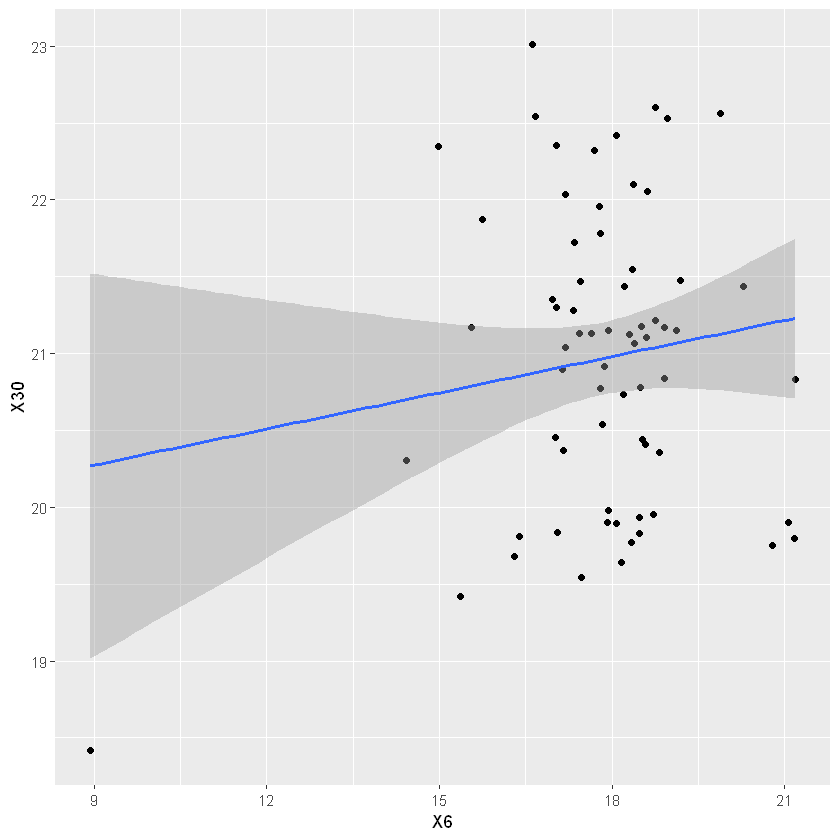

In [30]:
(prelim_plot <- ggplot(metab_filt, aes(x = X6, y = X30)) +
  geom_point() +
  geom_smooth(method = "lm"))

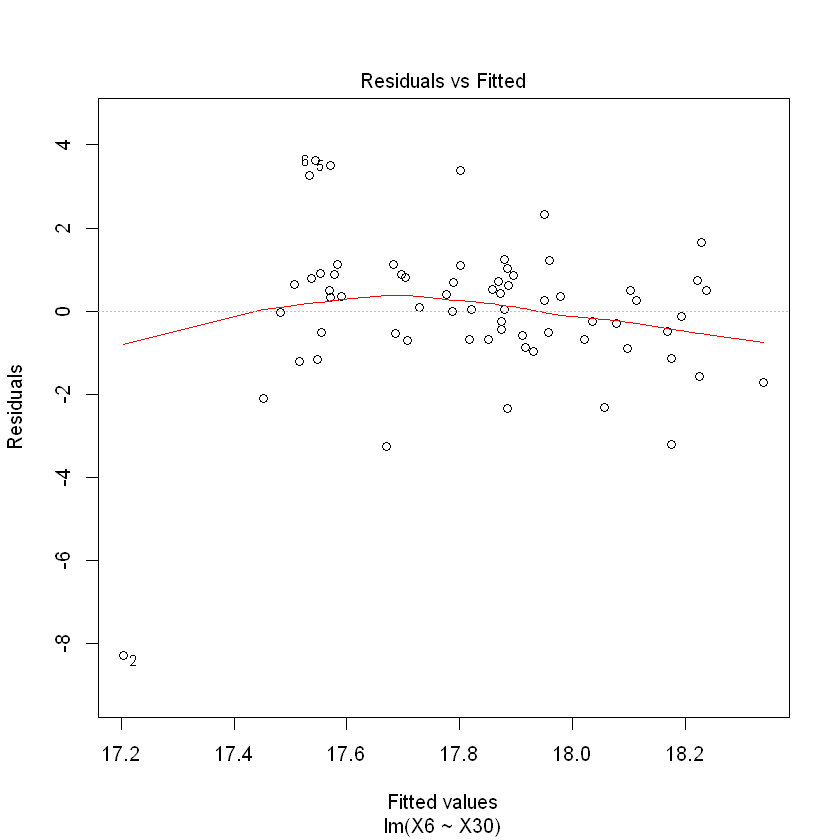

In [39]:
# Plot residuals from the fitted model using which=1


plot(test, which=1)

In [53]:
select(metab_filt, X10)

ERROR: Error in select(metab_filt, X10): could not find function "select"


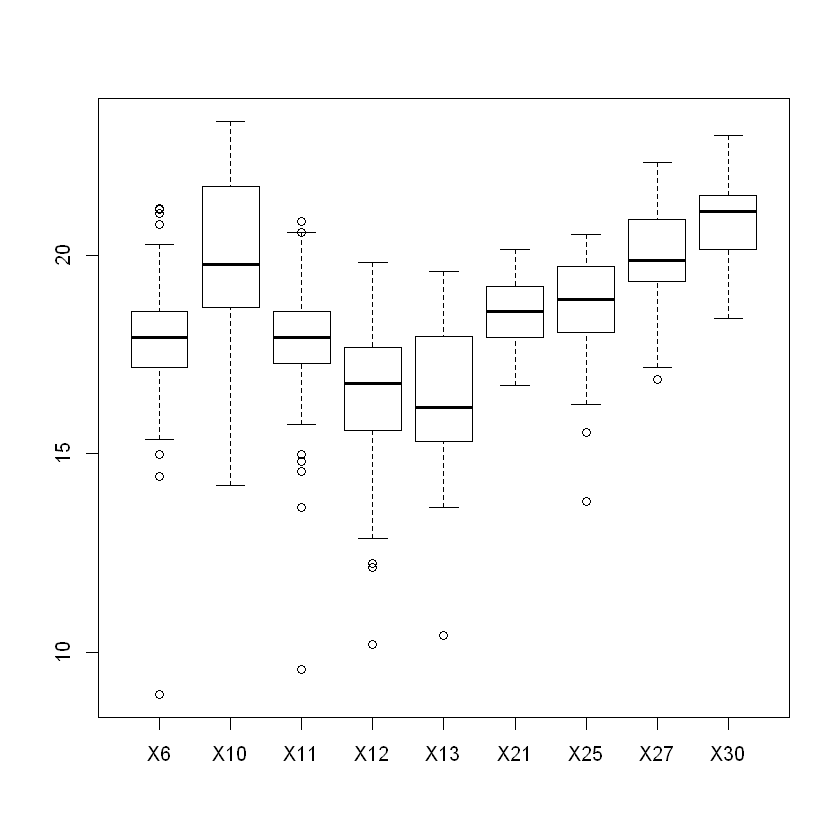

In [58]:
boxplot(select(metab_filt, X6: X30))

In [35]:
?plot

In [23]:
colnames(metab_filt)

[1] "X"      "X6"     "X10"    "X11"    "X12"    "X13"    "X21"    "X25"   
   [9] "X27"    "X30"    "X32"    "X33"    "X36"    "X39"    "X42"    "X44"   
  [17] "X45"    "X76"    "X77"    "X79"    "X83"    "X87"    "X99"    "X100"  
  [25] "X102"   "X107"   "X111"   "X116"   "X122"   "X124"   "X129"   "X130"  
  [33] "X133"   "X135"   "X136"   "X138"   "X140"   "X141"   "X142"   "X143"  
  [41] "X145"   "X186"   "X188"   "X189"   "X191"   "X193"   "X194"   "X195"  
  [49] "X196"   "X197"   "X198"   "X199"   "X200"   "X205"   "X207"   "X208"  
  [57] "X209"   "X212"   "X214"   "X215"   "X216"   "X218"   "X220"   "X222"  
  [65] "X223"   "X224"   "X238"   "X242"   "X243"   "X252"   "X258"   "X259"  
  [73] "X267"   "X270"   "X271"   "X272"   "X273"   "X274"   "X277"   "X279"  
  [81] "X280"   "X281"   "X282"   "X283"   "X284"   "X288"   "X309"   "X311"  
  [89] "X312"   "X313"   "X314"   "X319"   "X320"   "X321"   "X323"   "X324"  
  [97] "X326"   "X332"   "X339"   "X343"   "X349"   "X359"   "X360"   "X362"  
 [105] "X366"   "X367"   "X371"   "X377"   "X378"   "X379"   "X380"   "X381"  
 [113] "X383"   "X385"   "X386"   "X387"   "X388"   "X392"   "X394"   "X407"  
 [121] "X414"   "X442"   "X443"   "X456"   "X457"   "X472"   "X475"   "X504"  
 [129] "X516"   "X522"   "X523"   "X524"   "X525"   "X526"   "X527"   "X528"  
 [137] "X529"   "X534"   "X537"   "X544"   "X548"   "X549"   "X550"   "X553"  
 [145] "X554"   "X555"   "X557"   "X560"   "X561"   "X563"   "X566"   "X568"  
 [153] "X585"   "X586"   "X593"   "X597"   "X598"   "X600"   "X601"   "X603"  
 [161] "X616"   "X626"   "X628"   "X638"   "X640"   "X643"   "X644"   "X645"  
 [169] "X666"   "X667"   "X668"   "X669"   "X670"   "X673"   "X675"   "X677"  
 [177] "X684"   "X692"   "X693"   "X694"   "X695"   "X696"   "X697"   "X698"  
 [185] "X699"   "X700"   "X725"   "X726"   "X727"   "X731"   "X733"   "X747"  
 [193] "X764"   "X765"   "X766"   "X770"   "X771"   "X776"   "X780"   "X787"  
 [201] "X797"   "X807"   "X808"   "X811"   "X812"   "X813"   "X818"   "X819"  
 [209] "X822"   "X823"   "X826"   "X829"   "X830"   "X837"   "X842"   "X846"  
 [217] "X856"   "X860"   "X863"   "X864"   "X865"   "X867"   "X868"   "X871"  
 [225] "X872"   "X874"   "X878"   "X879"   "X880"   "X885"   "X897"   "X902"  
 [233] "X903"   "X904"   "X905"   "X910"   "X912"   "X915"   "X922"   "X924"  
 [241] "X934"   "X935"   "X944"   "X947"   "X956"   "X957"   "X960"   "X966"  
 [249] "X979"   "X980"   "X996"   "X997"   "X1001"  "X1011"  "X1013"  "X1038" 
 [257] "X1042"  "X1048"  "X1049"  "X1071"  "X1101"  "X1102"  "X1103"  "X1105" 
 [265] "X1106"  "X1108"  "X1110"  "X1114"  "X1120"  "X1123"  "X1126"  "X1132" 
 [273] "X1139"  "X1145"  "X1151"  "X1153"  "X1154"  "X1155"  "X1157"  "X1162" 
 [281] "X1167"  "X1168"  "X1198"  "X1201"  "X1202"  "X1203"  "X1206"  "X1207" 
 [289] "X1208"  "X1210"  "X1211"  "X1212"  "X1213"  "X1216"  "X1218"  "X1219" 
 [297] "X1220"  "X1225"  "X1227"  "X1228"  "X1229"  "X1230"  "X1233"  "X1238" 
 [305] "X1259"  "X1260"  "X1261"  "X1262"  "X1263"  "X1264"  "X1265"  "X1292" 
 [313] "X1293"  "X1307"  "X1313"  "X1318"  "X1320"  "X1324"  "X1325"  "X1335" 
 [321] "X1337"  "X1340"  "X1348"  "X1349"  "X1350"  "X1352"  "X1364"  "X1365" 
 [329] "X1367"  "X1374"  "X1384"  "X1409"  "X1410"  "X1413"  "X1414"  "X1415" 
 [337] "X1416"  "X1419"  "X1426"  "X1430"  "X1434"  "X1435"  "X1436"  "X1441" 
 [345] "X1444"  "X1450"  "X1453"  "X1455"  "X1462"  "X1465"  "X1470"  "X1482" 
 [353] "X1488"  "X1497"  "X1512"  "X1519"  "X1525"  "X1528"  "X1529"  "X1530" 
 [361] "X1532"  "X1534"  "X1536"  "X1549"  "X1554"  "X1555"  "X1558"  "X1560" 
 [369] "X1582"  "X1587"  "X1588"  "X1601"  "X1603"  "X1605"  "X1606"  "X1608" 
 [377] "X1612"  "X1614"  "X1615"  "X1617"  "X1618"  "X1622"  "X1624"  "X1625" 
 [385] "X1628"  "X1630"  "X1639"  "X1642"  "X1655"  "X1656"  "X1657"  "X1658" 
 [393] "X1660"  "X1661"  "X1665"  "X1669"  "X1677"  "X1680"  "X1687"  "X1702" 
 [401] "X1707"  "X1712"  "X1735"  "X1741"  "X1742"  "

In [15]:
hist(metab_filt$Average.Rt.min.)

ERROR: Error in hist.default(metab_filt$Average.Rt.min.): 'x' must be numeric


In [10]:
getRversion()

[1] '3.6.1'

In [12]:
library('devtools')

ERROR: Error in library("devtools"): there is no package called 'devtools'


In [ ]:
feature1 ~ OGTT * df.BG_type + 